# Import the warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading description to understand columns

In [4]:
cols=pd.read_csv('columns_description.csv',encoding='unicode_escape')
cols.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


## Checking the data

In [5]:
data=pd.read_csv('application_data.csv')
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# reading columns

data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [7]:
# Finding shape

data.shape

(307511, 122)

In [8]:
# checking info

data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [9]:
# describe the data

data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## Data cleaning and Manipulation

In [10]:
# reading the null values

data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [11]:
# Checking the percentage of null values greater than 40%

null_data=data.isnull().sum()*100/len(data)
max_null=null_data[null_data>40]
max_null

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [12]:
# Number of maximum null values in columns

len(max_null)

49

In [13]:
# Dropping the maximum missing values in columns

data1=data.drop(columns=max_null.index)

In [14]:
# shape of updated data set

data1.shape

(307511, 73)

In [15]:
# length of new data set

len(data1)

307511

In [16]:
# Checking if there is any null values in columns greater than 50%

null_val=data1.isnull().sum()*100/len(data1)
maximum_null=null_val[null_val>50]
maximum_null

Series([], dtype: float64)

#### Now,we are done with all the null values in columns with greater than 50%

#### Let's come to the null values which are less than 20%


In [17]:
min_null=null_data[(null_data<=20) & (null_data>0)].sort_values(ascending=False)
min_null

EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

#### We can see that , there are 10 columns having mising values within 0%-1% , we can impute them with mode or we can clearly drop them.
#### Others 7 columns have missing values around 13% to 19% , we are going to deal with them first.

In [18]:
min_null[0:7]

EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
dtype: float64

In [19]:
data1[min_null[0:7].index]

,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
0,0.139376,1.0,0.0,0.0,0.0,0.0,0.0
1,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,0.729567,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
307506,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,0.218859,1.0,0.0,1.0,0.0,0.0,1.0
307509,0.661024,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
data1[min_null[0:7].index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   EXT_SOURCE_3                246546 non-null  float64
 1   AMT_REQ_CREDIT_BUREAU_YEAR  265992 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_QRT   265992 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_MON   265992 non-null  float64
 4   AMT_REQ_CREDIT_BUREAU_WEEK  265992 non-null  float64
 5   AMT_REQ_CREDIT_BUREAU_DAY   265992 non-null  float64
 6   AMT_REQ_CREDIT_BUREAU_HOUR  265992 non-null  float64
dtypes: float64(7)
memory usage: 16.4 MB


In [21]:
# No of unique values of each column

print("EXT_SOURCE_3 unique values :", data1['EXT_SOURCE_3'].nunique())
print("AMT_REQ_CREDIT_BUREAU_YEAR :", data1['AMT_REQ_CREDIT_BUREAU_YEAR'].nunique())
print("AMT_REQ_CREDIT_BUREAU_QRT :", data1['AMT_REQ_CREDIT_BUREAU_QRT'].nunique())
print("AMT_REQ_CREDIT_BUREAU_MON :", data1['AMT_REQ_CREDIT_BUREAU_MON'].nunique())
print("AMT_REQ_CREDIT_BUREAU_WEEK :", data1['AMT_REQ_CREDIT_BUREAU_WEEK'].nunique())
print("AMT_REQ_CREDIT_BUREAU_DAY :", data1['AMT_REQ_CREDIT_BUREAU_DAY'].nunique())
print("AMT_REQ_CREDIT_BUREAU_HOUR :",data1['AMT_REQ_CREDIT_BUREAU_HOUR'].nunique())

EXT_SOURCE_3 unique values : 814
AMT_REQ_CREDIT_BUREAU_YEAR : 25
AMT_REQ_CREDIT_BUREAU_QRT : 11
AMT_REQ_CREDIT_BUREAU_MON : 24
AMT_REQ_CREDIT_BUREAU_WEEK : 9
AMT_REQ_CREDIT_BUREAU_DAY : 9
AMT_REQ_CREDIT_BUREAU_HOUR : 5


#### These values give us hint that they may be categorical values, it has unique values in most of the columns
#### Let's check the values in columns

In [22]:
data1['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

AMT_REQ_CREDIT_BUREAU_YEAR
0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: count, dtype: int64

In [23]:
data1['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

AMT_REQ_CREDIT_BUREAU_MON
0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: count, dtype: int64

In [24]:
data1['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

AMT_REQ_CREDIT_BUREAU_WEEK
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: count, dtype: int64

In [25]:
data1['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

AMT_REQ_CREDIT_BUREAU_DAY
0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: count, dtype: int64

In [26]:
data1["AMT_REQ_CREDIT_BUREAU_HOUR"].value_counts()

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: count, dtype: int64

In [27]:
data1['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

AMT_REQ_CREDIT_BUREAU_QRT
0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: count, dtype: int64

#### As per given description, these columns are categorical. So we can impute the null values with 0 as their mode values are 0

In [28]:
# Columns of new data set

data1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [29]:
data1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### There are lots of columns that have no need, let's drop them

In [30]:
unwanted_col=['FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE',
             'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
             'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15',
             'FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

In [31]:
data1.drop(columns=unwanted_col, inplace=True)

In [32]:
data1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Now we have final dataset for data analysis

## DATA ANALYSIS

In [33]:
data1.shape

(307511, 42)

In [34]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

In [35]:
data1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,306490.000000,306490.000000,306490.000000,306490.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,1.422245,0.143421,1.405292,0.100049,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,2.400989,0.446698,2.379803,0.362291,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,348.000000,34.000000,344.000000,24.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [36]:
data1.nunique().sort_values(ascending=True)

LIVE_CITY_NOT_WORK_CITY            2
REG_CITY_NOT_WORK_CITY             2
FLAG_MOBIL                         2
FLAG_OWN_REALTY                    2
REG_CITY_NOT_LIVE_CITY             2
NAME_CONTRACT_TYPE                 2
TARGET                             2
FLAG_OWN_CAR                       2
CODE_GENDER                        3
AMT_REQ_CREDIT_BUREAU_HOUR         5
NAME_EDUCATION_TYPE                5
NAME_HOUSING_TYPE                  6
NAME_FAMILY_STATUS                 6
NAME_TYPE_SUITE                    7
WEEKDAY_APPR_PROCESS_START         7
NAME_INCOME_TYPE                   8
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
DEF_60_CNT_SOCIAL_CIRCLE           9
DEF_30_CNT_SOCIAL_CIRCLE          10
AMT_REQ_CREDIT_BUREAU_QRT         11
CNT_CHILDREN                      15
CNT_FAM_MEMBERS                   17
OCCUPATION_TYPE                   18
AMT_REQ_CREDIT_BUREAU_MON         24
HOUR_APPR_PROCESS_START           24
AMT_REQ_CREDIT_BUREAU_YEAR        25
O

#### We have noticed that all the columns till 'ORGANIZATION_TYPE' are categorical type, so we have to convert their dtype

In [37]:
cat_cols=['LIVE_CITY_NOT_WORK_CITY','REG_CITY_NOT_WORK_CITY','FLAG_MOBIL','FLAG_OWN_REALTY','REG_CITY_NOT_LIVE_CITY','NAME_CONTRACT_TYPE',
         'TARGET','FLAG_OWN_CAR','CODE_GENDER','AMT_REQ_CREDIT_BUREAU_HOUR','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE',
         'NAME_FAMILY_STATUS','NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START','NAME_INCOME_TYPE','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
         'DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_QRT','CNT_CHILDREN','CNT_FAM_MEMBERS','OCCUPATION_TYPE','AMT_REQ_CREDIT_BUREAU_MON',
         'HOUR_APPR_PROCESS_START','AMT_REQ_CREDIT_BUREAU_YEAR','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','ORGANIZATION_TYPE']

for i in cat_cols:
    data1[i]=data1[i].astype('category')

#### SK_ID_CURR is int data type, but it contaions id of customers which can not be manipulated, so we convert them into object data type

In [38]:
data1['SK_ID_CURR']=data1['SK_ID_CURR'].astype('object')

In [39]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  object  
 1   TARGET                      307511 non-null  category
 2   NAME_CONTRACT_TYPE          307511 non-null  category
 3   CODE_GENDER                 307511 non-null  category
 4   FLAG_OWN_CAR                307511 non-null  category
 5   FLAG_OWN_REALTY             307511 non-null  category
 6   CNT_CHILDREN                307511 non-null  category
 7   AMT_INCOME_TOTAL            307511 non-null  float64 
 8   AMT_CREDIT                  307511 non-null  float64 
 9   AMT_ANNUITY                 307499 non-null  float64 
 10  AMT_GOODS_PRICE             307233 non-null  float64 
 11  NAME_TYPE_SUITE             306219 non-null  category
 12  NAME_INCOME_TYPE            307511 non-null  category
 13 

In [40]:
data1.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3
count,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000
mean,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,5.143927e-01,0.510853
std,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,1.910602e-01,0.194844
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,8.173617e-08,0.000527
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,3.924574e-01,0.370650
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,5.659614e-01,0.535276
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,6.636171e-01,0.669057
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,8.549997e-01,0.896010


#### Some columns contain negative values which can not be possible , so let's change them.

In [41]:
data1[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373
std,4363.988632,141275.766519,3522.886321,1509.450419
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000
max,-7489.000000,365243.000000,0.000000,0.000000


#### Let's change the negative value to positive and change the days into years

In [42]:
days_col=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

data1[days_col]=data1[days_col].abs()
data1[days_col]=data1[days_col]/365
data1[days_col].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,43.936973,185.547239,13.660604,8.203294
std,11.956133,382.037676,9.651743,4.135481
min,20.517808,0.000000,0.000000,0.000000
25%,34.008219,2.556164,5.506849,4.712329
50%,43.150685,6.079452,12.339726,8.915068
75%,53.923288,15.635616,20.491781,11.778082
max,69.120548,1000.665753,67.594521,19.717808


####  Now we successfully change the days into year , let's change the column name

In [43]:
data1.rename(columns={'DAYS_BIRTH': 'Birth_Year','DAYS_EMPLOYED':'Employment_Year','DAYS_REGISTRATION':'Registration_Year','DAYS_ID_PUBLISH':'Publishing_Year'},inplace=True)


In [44]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  object  
 1   TARGET                      307511 non-null  category
 2   NAME_CONTRACT_TYPE          307511 non-null  category
 3   CODE_GENDER                 307511 non-null  category
 4   FLAG_OWN_CAR                307511 non-null  category
 5   FLAG_OWN_REALTY             307511 non-null  category
 6   CNT_CHILDREN                307511 non-null  category
 7   AMT_INCOME_TOTAL            307511 non-null  float64 
 8   AMT_CREDIT                  307511 non-null  float64 
 9   AMT_ANNUITY                 307499 non-null  float64 
 10  AMT_GOODS_PRICE             307233 non-null  float64 
 11  NAME_TYPE_SUITE             306219 non-null  category
 12  NAME_INCOME_TYPE            307511 non-null  category
 13 

#### Let's check CODE_GENDER column

In [45]:
data1['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [46]:
# let's impute XNA with mode value

data1.loc[data1['CODE_GENDER']=='XNA','CODE_GENDER']='F'
data1['CODE_GENDER'].value_counts()



CODE_GENDER
F      202452
M      105059
XNA         0
Name: count, dtype: int64

#### Let's check AMT_INCOME_TOTAL and AMT_CREDIT variables

In [47]:
data1[['AMT_INCOME_TOTAL','AMT_CREDIT']].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT
count,3.075110e+05,3.075110e+05
mean,1.687979e+05,5.990260e+05
std,2.371231e+05,4.024908e+05
min,2.565000e+04,4.500000e+04
25%,1.125000e+05,2.700000e+05
50%,1.471500e+05,5.135310e+05
75%,2.025000e+05,8.086500e+05
max,1.170000e+08,4.050000e+06


In [48]:
# Its hard to determine the type of customers based on these ,so we will categorize them into different ranges.

bins=[0, 100000, 250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000, 2000000, 2250000, 2500000, 2750000, 3000000, 3250000, 3500000, 3750000, 4000000, 4250000, 4500000, 4750000, 5000000, 150000000]
ranges=['0-100000','100000-250000','250000-500000','500000-750000','750000-1000000','1000000-1250000','1250000-1500000','1500000-1750000','1750000-2000000','2000000-2250000','2250000-2500000','2500000-2750000','2750000-300000',
       '3000000-3250000','3250000-3500000','3500000-3750000','3750000-4000000','4000000-4250000','4250000-4500000','4500000-4750000','4750000-5000000','5000000 and above']

data1['Amt_Income_Range']=pd.cut(data1['AMT_INCOME_TOTAL'],bins,labels=ranges)
data1['Amt_Credit_Range']=pd.cut(data1['AMT_CREDIT'],bins,labels=ranges)




In [49]:
data1[['Amt_Income_Range','Amt_Credit_Range']].describe()

,Amt_Income_Range,Amt_Credit_Range
count,307511,307511
unique,19,18
top,100000-250000,250000-500000
freq,204035,90135


In [50]:
data1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Amt_Income_Range,Amt_Credit_Range
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,100000-250000,250000-500000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-500000,1250000-1500000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-100000,100000-250000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,100000-250000,250000-500000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-250000,500000-750000


In [51]:
data1['AGE_GROUP']=pd.cut(data1.Birth_Year, bins=[0,18,28,35,45,50,60,75])

In [52]:
data1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Amt_Income_Range,Amt_Credit_Range,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,0.0,0.0,0.0,0.0,0.0,1.0,100000-250000,250000-500000,"(18, 28]"
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-500000,1250000-1500000,"(45, 50]"
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-100000,100000-250000,"(50, 60]"
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,100000-250000,250000-500000,"(50, 60]"
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-250000,500000-750000,"(50, 60]"


In [53]:
data1['INCOME_GROUP']=pd.cut(data1.AMT_INCOME_TOTAL , bins=[0,250000,500000,1500000,3000000,4500000,7500000], labels=['Very Low Income(<2.5L)','Low Income(2.5-5L)','Medium Income(5-15L)','Good Income(15-30L)','High Income(30-45L)', 'Upper Class(>75L)'])


In [54]:
data1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Amt_Income_Range,Amt_Credit_Range,AGE_GROUP,INCOME_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,1.0,100000-250000,250000-500000,"(18, 28]",Very Low Income(<2.5L)
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,250000-500000,1250000-1500000,"(45, 50]",Low Income(2.5-5L)
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0-100000,100000-250000,"(50, 60]",Very Low Income(<2.5L)
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,100000-250000,250000-500000,"(50, 60]",Very Low Income(<2.5L)
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,100000-250000,500000-750000,"(50, 60]",Very Low Income(<2.5L)


#### Plotting counter plot on amount_credit genderwise

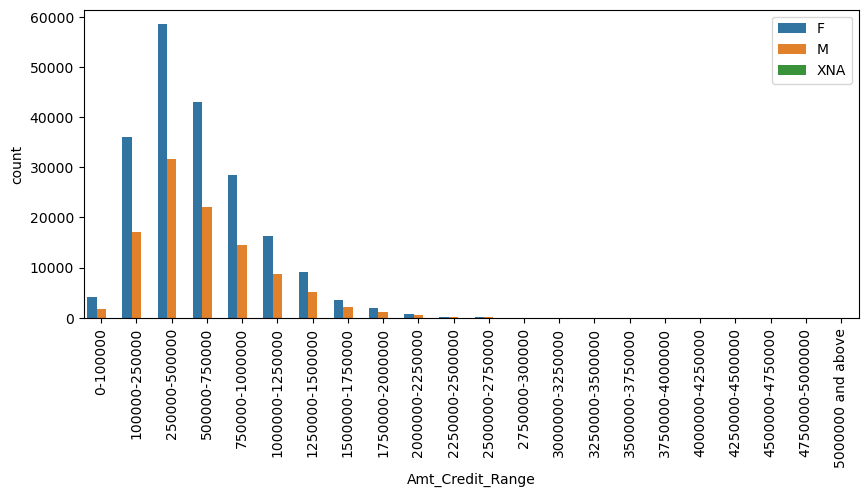

In [55]:
plt.figure(figsize=[10,4])
sns.countplot(data=data1,x='Amt_Credit_Range',hue='CODE_GENDER')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

### Checking the outliers

In [56]:
data1.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,Birth_Year,Employment_Year,Registration_Year,Publishing_Year,EXT_SOURCE_2,EXT_SOURCE_3
count,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000
mean,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,43.936973,185.547239,13.660604,8.203294,5.143927e-01,0.510853
std,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,11.956133,382.037676,9.651743,4.135481,1.910602e-01,0.194844
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,20.517808,0.000000,0.000000,0.000000,8.173617e-08,0.000527
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,34.008219,2.556164,5.506849,4.712329,3.924574e-01,0.370650
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,43.150685,6.079452,12.339726,8.915068,5.659614e-01,0.535276
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,53.923288,15.635616,20.491781,11.778082,6.636171e-01,0.669057
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,69.120548,1000.665753,67.594521,19.717808,8.549997e-01,0.896010


In [57]:
data1['CNT_CHILDREN'].value_counts()

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
10         2
12         2
19         2
11         1
Name: count, dtype: int64

In [58]:
data1['CNT_CHILDREN'].info

<bound method Series.info of 0         0
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    0
307510    0
Name: CNT_CHILDREN, Length: 307511, dtype: category
Categories (15, int64): [0, 1, 2, 3, ..., 11, 12, 14, 19]>

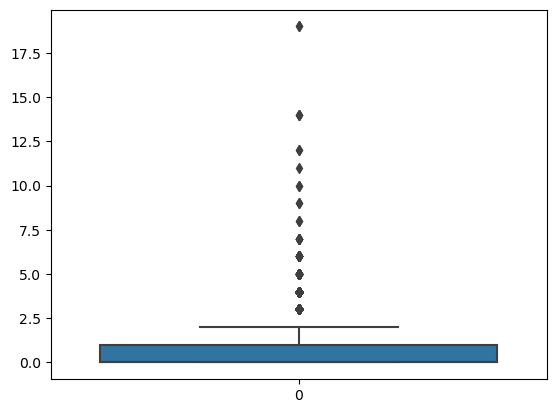

In [59]:
sns.boxplot(data1['CNT_CHILDREN'])
plt.show()

#### We can say that there are so many outliers because it is not possible to have 19 children

### Let's mae box plot for 'AMT_INCOME_TOTAL'

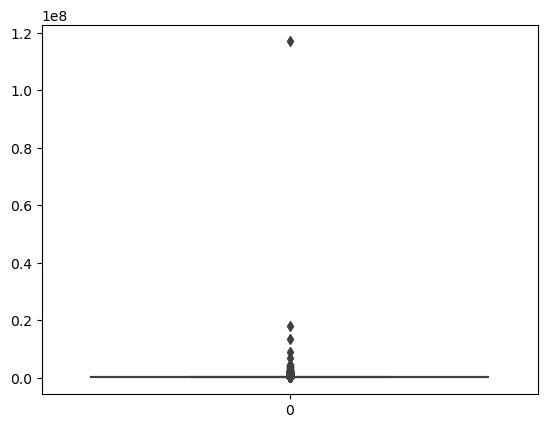

In [60]:
sns.boxplot(data1['AMT_INCOME_TOTAL'])
plt.show()

In [61]:
#let's see the outlier 

data1['AMT_INCOME_TOTAL'].max()

117000000.0

### Let's see the outliers of 'AMT_CREDIT'

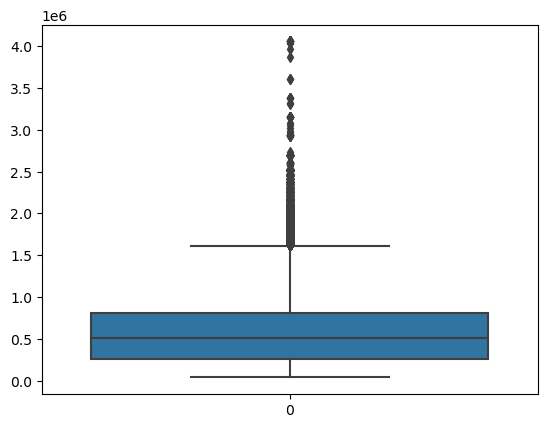

In [62]:
sns.boxplot(data1['AMT_CREDIT'])
plt.show()

In [63]:
# let's  see which rows have  more AMT_CREDIT than AMT_INCOME _TOTAL

data1[data1['AMT_CREDIT']> data1['AMT_INCOME_TOTAL']]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Amt_Income_Range,Amt_Credit_Range,AGE_GROUP,INCOME_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,1.0,100000-250000,250000-500000,"(18, 28]",Very Low Income(<2.5L)
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,250000-500000,1250000-1500000,"(45, 50]",Low Income(2.5-5L)
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0-100000,100000-250000,"(50, 60]",Very Low Income(<2.5L)
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,100000-250000,250000-500000,"(50, 60]",Very Low Income(<2.5L)
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,100000-250000,500000-750000,"(50, 60]",Very Low Income(<2.5L)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100000-250000,250000-500000,"(18, 28]",Very Low Income(<2.5L)
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,NaN,NaN,NaN,NaN,NaN,NaN,0-100000,250000-500000,"(50, 60]",Very Low Income(<2.5L)
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,1.0,0.0,0.0,1.0,0.0,1.0,100000-250000,500000-750000,"(35, 45]",Very Low Income(<2.5L)
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,100000-250000,250000-500000,"(28, 35]",Very Low Income(<2.5L)


In [64]:
# In almost all cases it is proved that the credit amount is higher than anuual income
# Now let's check which are more than 3.5*1e6 as there are so many outliers

data1[data1['AMT_CREDIT']>3.5*1e6]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Amt_Income_Range,Amt_Credit_Range,AGE_GROUP,INCOME_GROUP
14643,117085,0,Cash loans,F,Y,N,2,749331.0,3956274.0,197230.5,...,0.0,0.0,0.0,0.0,0.0,1.0,500000-750000,3750000-4000000,"(50, 60]",Medium Income(5-15L)
14852,117337,0,Cash loans,M,N,Y,1,760846.5,4050000.0,146002.5,...,0.0,0.0,0.0,0.0,0.0,0.0,750000-1000000,4000000-4250000,"(35, 45]",Medium Income(5-15L)
17948,120926,0,Cash loans,M,Y,N,2,783000.0,4050000.0,258025.5,...,0.0,0.0,0.0,0.0,0.0,0.0,750000-1000000,4000000-4250000,"(35, 45]",Medium Income(5-15L)
53936,162494,0,Cash loans,M,Y,N,0,900450.0,3600000.0,91008.0,...,0.0,0.0,0.0,1.0,0.0,0.0,750000-1000000,3500000-3750000,"(35, 45]",Medium Income(5-15L)
95571,210956,0,Cash loans,M,N,Y,0,430650.0,4031032.5,102033.0,...,0.0,0.0,0.0,0.0,0.0,0.0,250000-500000,4000000-4250000,"(45, 50]",Low Income(2.5-5L)
104577,221360,0,Cash loans,M,Y,N,0,468000.0,3600000.0,91138.5,...,0.0,0.0,0.0,0.0,0.0,0.0,250000-500000,3500000-3750000,"(28, 35]",Low Income(2.5-5L)
110459,228135,0,Cash loans,M,N,N,2,864900.0,4050000.0,102384.0,...,0.0,0.0,0.0,4.0,0.0,0.0,750000-1000000,4000000-4250000,"(35, 45]",Medium Income(5-15L)
119380,238431,0,Cash loans,F,Y,N,0,292050.0,3860019.0,97578.0,...,0.0,0.0,0.0,0.0,0.0,2.0,250000-500000,3750000-4000000,"(35, 45]",Low Income(2.5-5L)
119681,238782,0,Cash loans,M,Y,Y,1,931365.0,4050000.0,102514.5,...,0.0,0.0,0.0,0.0,0.0,0.0,750000-1000000,4000000-4250000,"(28, 35]",Medium Income(5-15L)
120757,240007,0,Cash loans,M,N,N,0,587250.0,4050000.0,106969.5,...,0.0,0.0,0.0,0.0,0.0,0.0,500000-750000,4000000-4250000,"(50, 60]",Medium Income(5-15L)


#### Now let's check Employment_Year column

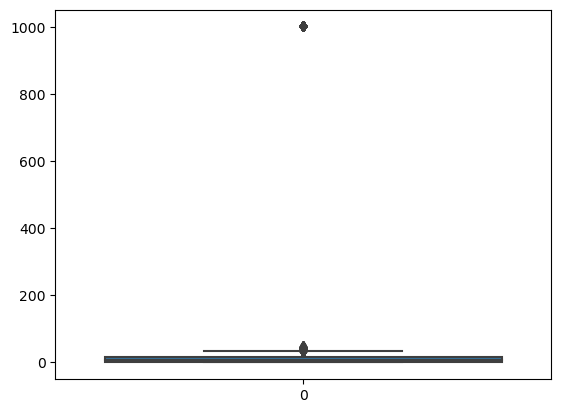

In [65]:
# From describe we have seen that the maximum value of the column is 1000 , which canm not be possible , it would definitely be an outlier

sns.boxplot(data1['Employment_Year'])
plt.show()

#### Now assigning a new column  'DEF_NOTDEF' based on Target variable , where target=0 will be Nondefaulter and target=1 will be defaulter

In [66]:
data1['DEF_NOTDEF']=np.where(data1.TARGET==0 , 'NON-DEFAULTER' , 'DEFAULTER')

In [67]:
data1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Amt_Income_Range,Amt_Credit_Range,AGE_GROUP,INCOME_GROUP,DEF_NOTDEF
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,1.0,100000-250000,250000-500000,"(18, 28]",Very Low Income(<2.5L),DEFAULTER
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,250000-500000,1250000-1500000,"(45, 50]",Low Income(2.5-5L),NON-DEFAULTER
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0-100000,100000-250000,"(50, 60]",Very Low Income(<2.5L),NON-DEFAULTER
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,100000-250000,250000-500000,"(50, 60]",Very Low Income(<2.5L),NON-DEFAULTER
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,100000-250000,500000-750000,"(50, 60]",Very Low Income(<2.5L),NON-DEFAULTER


## Since we have done majority of data cleaning now, we will move towards univariate, bivariate, multivariate analysis as needed.

In [68]:
data1.TARGET.info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: TARGET
Non-Null Count   Dtype   
--------------   -----   
307511 non-null  category
dtypes: category(1)
memory usage: 300.6 KB


In [69]:
data1.TARGET.value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [70]:
data1.TARGET.value_counts(normalize=True)*100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

#### Observation :  Most of the applicants are non defaulters as we seen there. More than 92% people did not default as compared to 8% who are defaulters.

In [71]:
def_r=data1[data1.TARGET==1]
non_def=data1[data1.TARGET==0]

In [72]:
def_r.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Amt_Income_Range,Amt_Credit_Range,AGE_GROUP,INCOME_GROUP,DEF_NOTDEF
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,1.0,100000-250000,250000-500000,"(18, 28]",Very Low Income(<2.5L),DEFAULTER
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0.0,0.0,0.0,2.0,2.0,100000-250000,750000-1000000,"(50, 60]",Very Low Income(<2.5L),DEFAULTER
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0.0,0.0,2.0,0.0,4.0,100000-250000,1000000-1250000,"(45, 50]",Very Low Income(<2.5L),DEFAULTER
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0.0,0.0,0.0,0.0,2.0,100000-250000,250000-500000,"(35, 45]",Very Low Income(<2.5L),DEFAULTER
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0.0,0.0,0.0,0.0,0.0,0-100000,250000-500000,"(60, 75]",Very Low Income(<2.5L),DEFAULTER


In [73]:
non_def.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Amt_Income_Range,Amt_Credit_Range,AGE_GROUP,INCOME_GROUP,DEF_NOTDEF
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,250000-500000,1250000-1500000,"(45, 50]",Low Income(2.5-5L),NON-DEFAULTER
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0-100000,100000-250000,"(50, 60]",Very Low Income(<2.5L),NON-DEFAULTER
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,100000-250000,250000-500000,"(50, 60]",Very Low Income(<2.5L),NON-DEFAULTER
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,100000-250000,500000-750000,"(50, 60]",Very Low Income(<2.5L),NON-DEFAULTER
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,0.0,1.0,1.0,0-100000,250000-500000,"(45, 50]",Very Low Income(<2.5L),NON-DEFAULTER


## Univariate Analysis

### Target variable : Gender

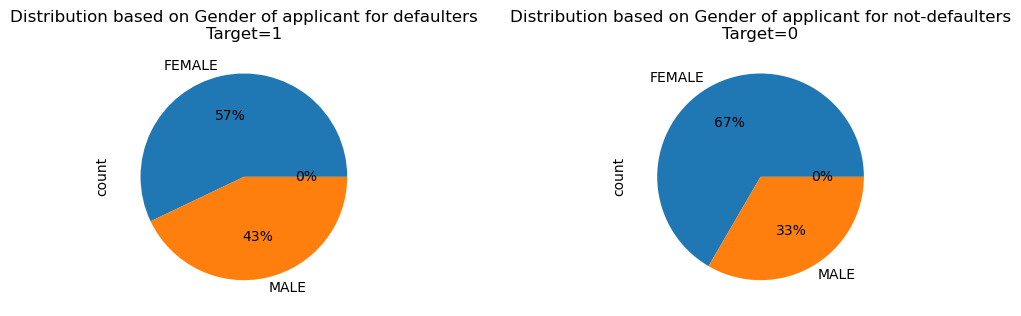

In [74]:
plt.figure(figsize=[10,6])
plt.subplot(1,2,1)
plt.title("Distribution based on Gender of applicant for defaulters\nTarget=1")
def_r.CODE_GENDER.value_counts().plot.pie(autopct='%1.f%%', labels=['FEMALE','MALE','OTHERS'])

plt.subplots_adjust(wspace=1)
plt.subplot(1,2,2)
plt.title("Distribution based on Gender of applicant for not-defaulters\nTarget=0")
non_def.CODE_GENDER.value_counts().plot.pie(autopct='%1.f%%',labels=['FEMALE','MALE','OTHERS'])

plt.show()

#### Observation :  Close to 60% applicants are female in defaulters and close to 70% applicants are female in non-defaulters.
#### It seems that there are more chances of women applicants are being defaulters.

### Target variable : Age Group

In [75]:
data1.AGE_GROUP.value_counts()

AGE_GROUP
(35, 45]    84274
(50, 60]    68062
(28, 35]    55084
(60, 75]    35579
(45, 50]    35135
(18, 28]    29377
(0, 18]         0
Name: count, dtype: int64

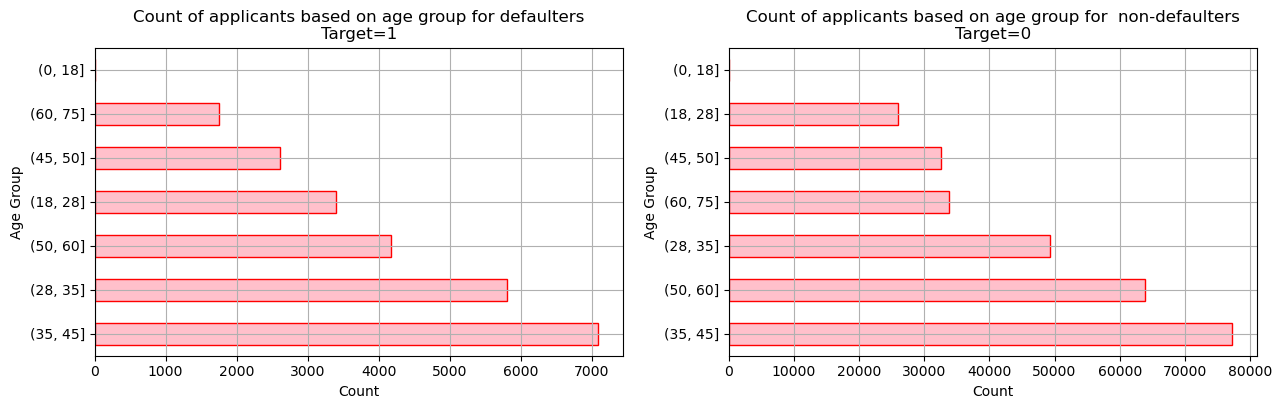

In [76]:
plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
plt.title("Count of applicants based on age group for defaulters\nTarget=1")
def_r.AGE_GROUP.value_counts().plot.barh(color='pink',edgecolor='red', grid=True)
plt.xlabel('Count')
plt.ylabel('Age Group')

plt.subplots_adjust(wspace=0.2)
plt.subplot(1,2,2)
plt.title("Count of applicants based on age group for  non-defaulters\nTarget=0")
non_def.AGE_GROUP.value_counts().plot.barh(color='pink',edgecolor='red', grid=True)
plt.xlabel('Count')
plt.ylabel('Age Group')

plt.show()

#### Observation : Most of the applicants are falling under age group of 35-45 years in both defaulters  and non-defaulters category.
#### There are no applicant less than 18 years of age in both the category.

#### Non defaulter category: 2nd highest are in 50-60 age group and 3rd highest in 28-35 age group
#### Defaulter category : 2nd highest are in 28-35 age group and 3rd highest in 50-60 age group

### Target Variable : Income group

In [77]:
data1.INCOME_GROUP.value_counts()

INCOME_GROUP
Very Low Income(<2.5L)    267733
Low Income(2.5-5L)         37076
Medium Income(5-15L)        2618
Good Income(15-30L)           67
High Income(30-45L)           12
Upper Class(>75L)              1
Name: count, dtype: int64

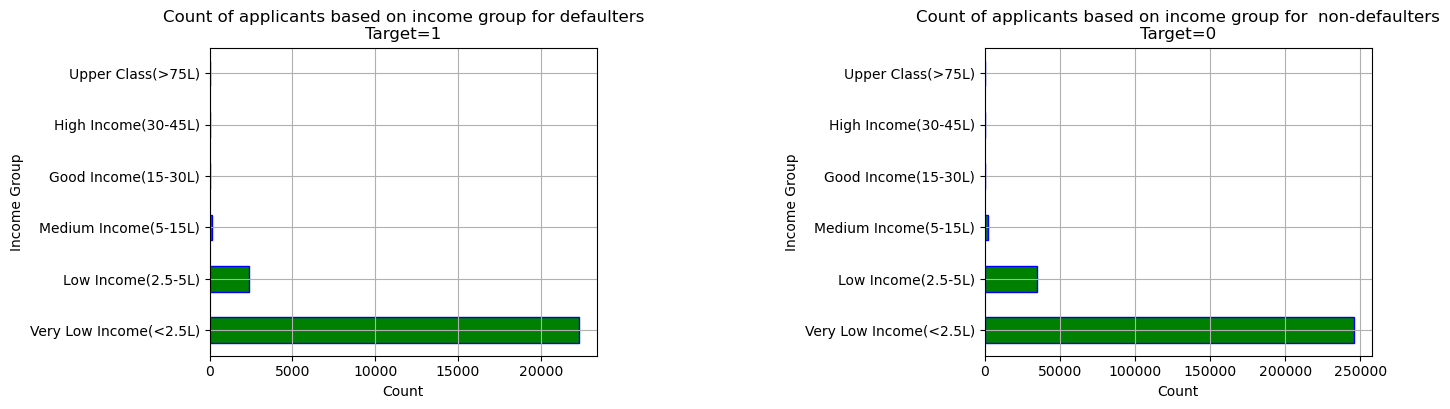

In [78]:
plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
plt.title("Count of applicants based on income group for defaulters\nTarget=1")
def_r.INCOME_GROUP.value_counts().plot.barh(color='green',edgecolor='blue', grid=True)
plt.xlabel('Count')
plt.ylabel('Income Group')

plt.subplots_adjust(wspace=1)
plt.subplot(1,2,2)
plt.title("Count of applicants based on income group for  non-defaulters\nTarget=0")
non_def.INCOME_GROUP.value_counts().plot.barh(color='green',edgecolor='blue', grid=True)
plt.xlabel('Count')
plt.ylabel('Income Group')

plt.show()

#### Observations : Most of the applicants are from very low income group i.e. less than 2.5L in both the category
#### 2nd highest is from Low income group and 3rd highest is from Medium income group and there are very few applicants having income more than 15L

In [79]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  object  
 1   TARGET                      307511 non-null  category
 2   NAME_CONTRACT_TYPE          307511 non-null  category
 3   CODE_GENDER                 307511 non-null  category
 4   FLAG_OWN_CAR                307511 non-null  category
 5   FLAG_OWN_REALTY             307511 non-null  category
 6   CNT_CHILDREN                307511 non-null  category
 7   AMT_INCOME_TOTAL            307511 non-null  float64 
 8   AMT_CREDIT                  307511 non-null  float64 
 9   AMT_ANNUITY                 307499 non-null  float64 
 10  AMT_GOODS_PRICE             307233 non-null  float64 
 11  NAME_TYPE_SUITE             306219 non-null  category
 12  NAME_INCOME_TYPE            307511 non-null  category
 13 

### Target Variable : Occupation Type

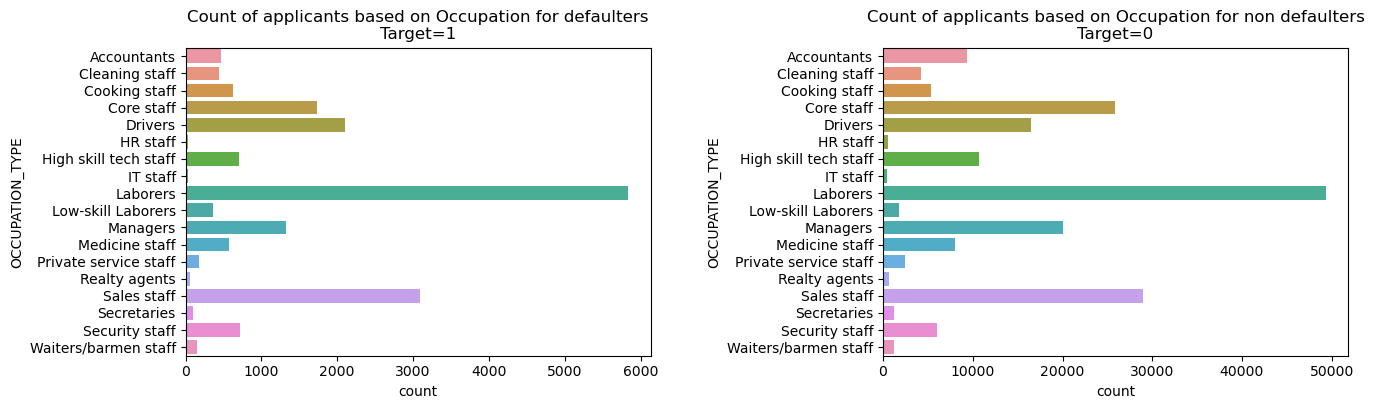

In [80]:
plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
plt.title("Count of applicants based on Occupation for defaulters\nTarget=1")
sns.countplot(y=def_r.OCCUPATION_TYPE)

plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,2)
plt.title("Count of applicants based on Occupation for non defaulters\nTarget=0")
sns.countplot(y=non_def.OCCUPATION_TYPE)

plt.show()

#### Observations: Most of the applicants are belong to labourers as occupation , 2nd highest occupation is Sales staff.

### Target Variable : Name Income type

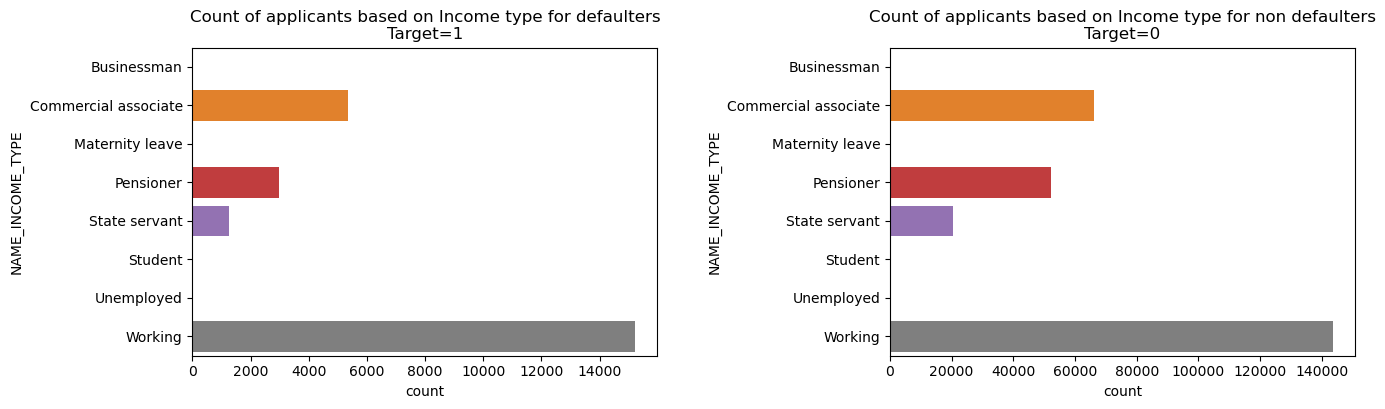

In [81]:
plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
plt.title("Count of applicants based on Income type for defaulters\nTarget=1")
sns.countplot(y=def_r.NAME_INCOME_TYPE)

plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,2)
plt.title("Count of applicants based on Income type for non defaulters\nTarget=0")
sns.countplot(y=non_def.NAME_INCOME_TYPE)

plt.show()

#### Observation : Most of the loans are distributed  to working class people , Pensioners are also good in number for applying loans and mostly they are non -defaulters.

### Target Variable : Name Contract Type

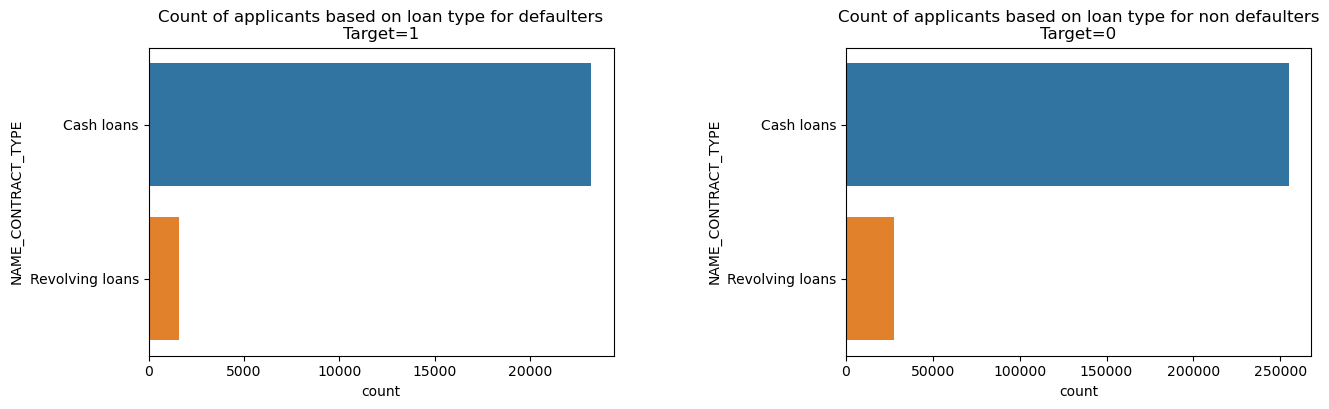

In [82]:
plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
plt.title("Count of applicants based on loan type for defaulters\nTarget=1")
sns.countplot(y=def_r.NAME_CONTRACT_TYPE)

plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,2)
plt.title("Count of applicants based on loan type for non defaulters\nTarget=0")
sns.countplot(y=non_def.NAME_CONTRACT_TYPE)

plt.show()

#### Observation : Most of the loan types are cash loans in both category

### Target Variable : Name Education Type 

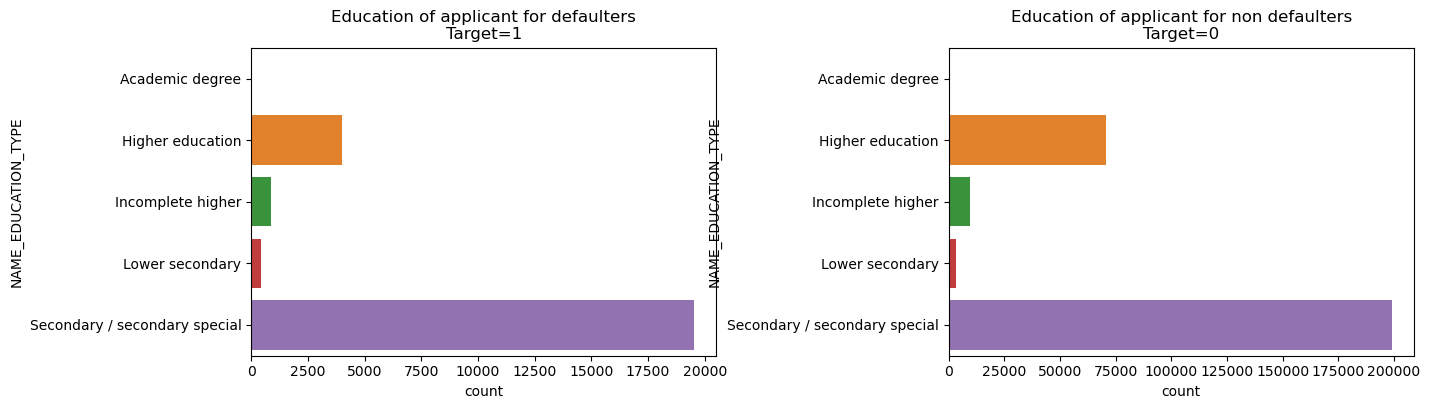

In [83]:
plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
plt.title("Education of applicant for defaulters\nTarget=1")
sns.countplot(y=def_r.NAME_EDUCATION_TYPE)

plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,2)
plt.title("Education of applicant for non defaulters\nTarget=0")
sns.countplot(y=non_def.NAME_EDUCATION_TYPE)

plt.show()

#### Observation: Most applicants have completed secondary education in both category, secondly many of them have completed higher education and lastly academic degree holders are almost negligible in both category.

### Target Variable : Flag own car

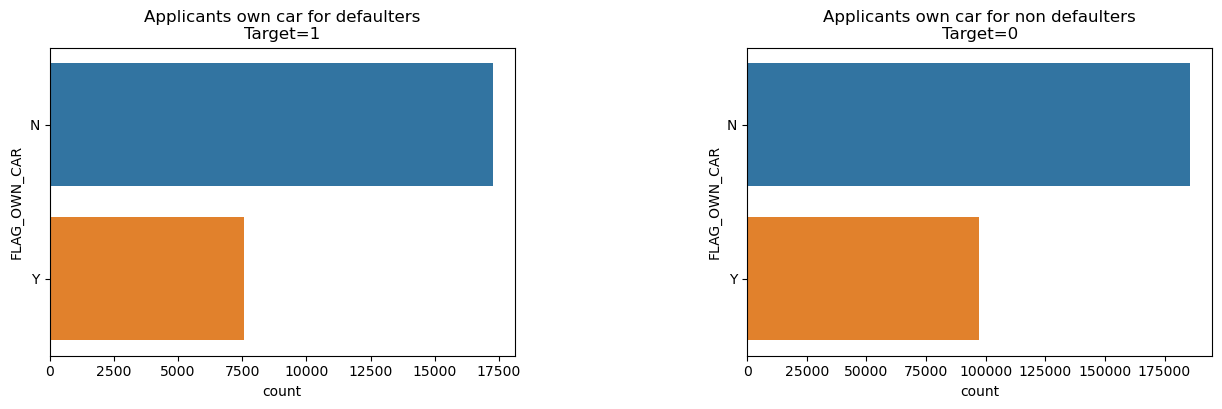

In [84]:
plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
plt.title("Applicants own car for defaulters\nTarget=1")
sns.countplot(y=def_r.FLAG_OWN_CAR)

plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,2)
plt.title("Applicants own car for non defaulters\nTarget=0")
sns.countplot(y=non_def.FLAG_OWN_CAR)

plt.show()

#### Observation : Most of the applicants don't have a car, we can also say that the number of default of people having car is low compared to people who don't default

### Target Variable : Name housing type

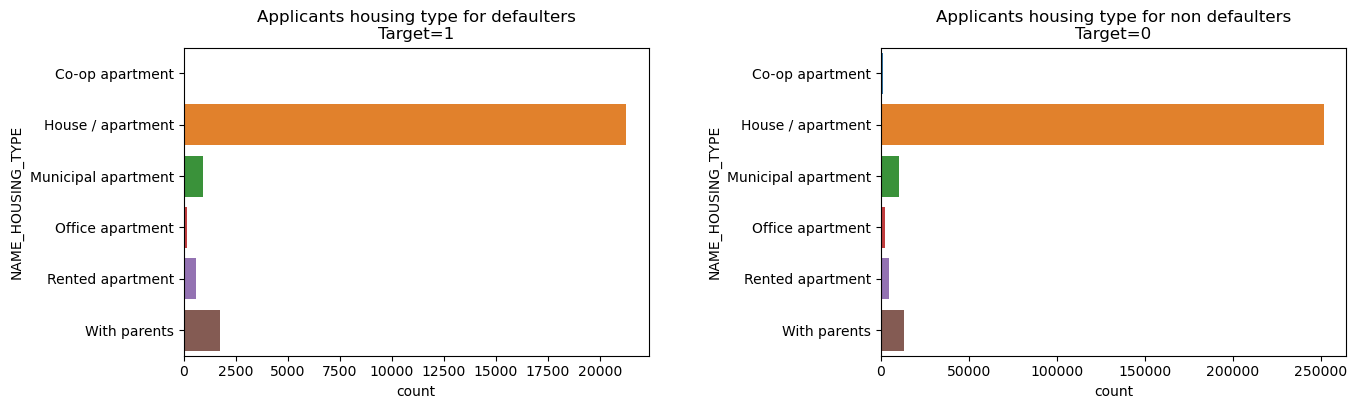

In [85]:
plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
plt.title("Applicants housing type for defaulters\nTarget=1")
sns.countplot(y=def_r.NAME_HOUSING_TYPE)

plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,2)
plt.title("Applicants housing type for non defaulters\nTarget=0")
sns.countplot(y=non_def.NAME_HOUSING_TYPE)

plt.show()

#### Observation: No of non default applicants who own a house  is  more than no of default applicant who own a house.

## Bivariate analysis

In [90]:
numeric_def=def_r[['TARGET','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','Birth_Year','Employment_Year','REGION_POPULATION_RELATIVE']]
numeric_nondef=non_def[['TARGET','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','Birth_Year','Employment_Year','REGION_POPULATION_RELATIVE']]


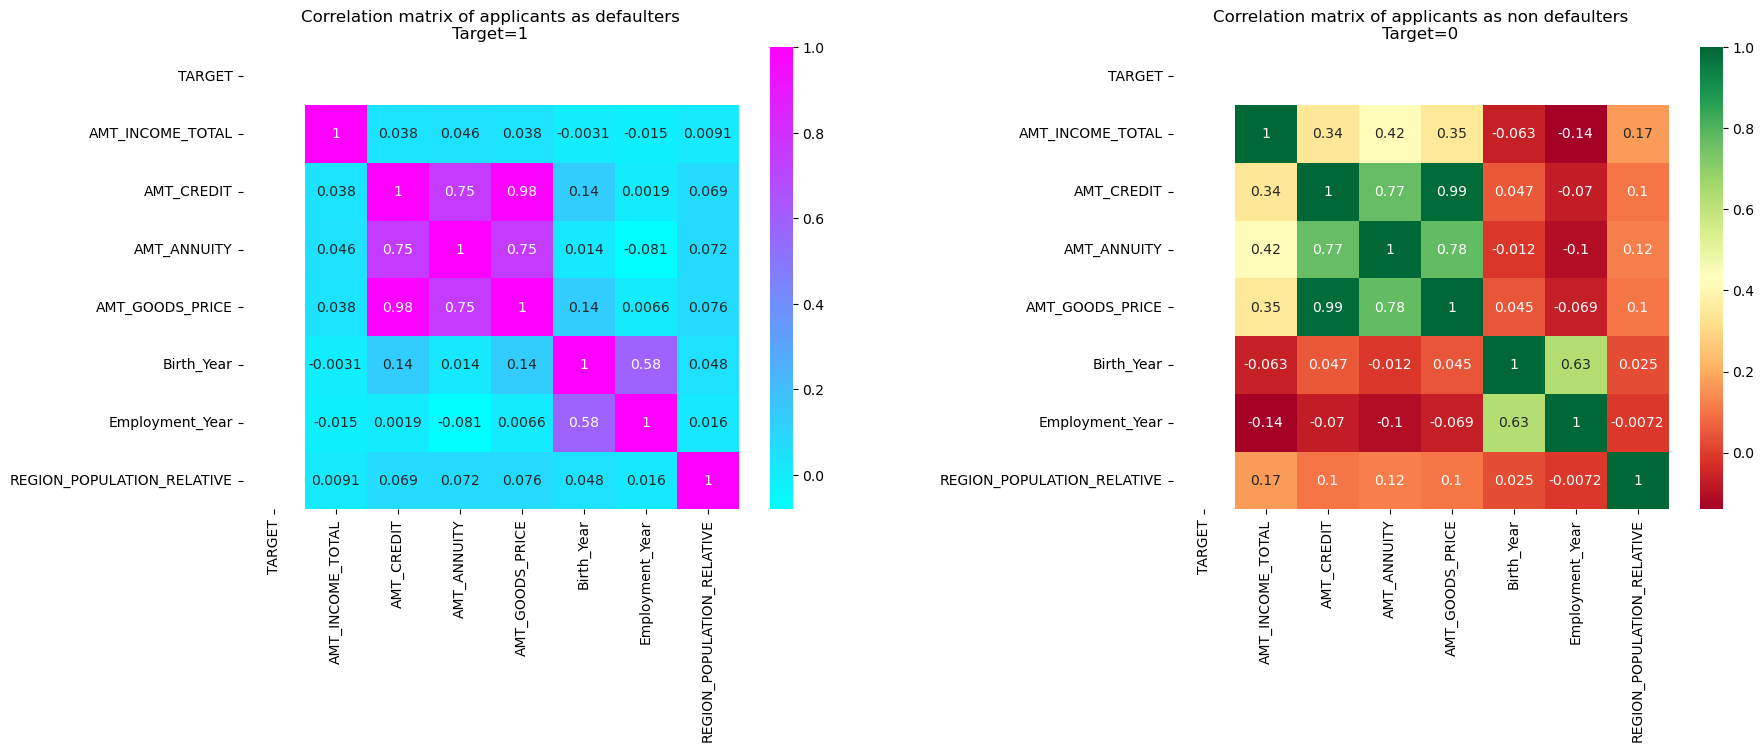

In [91]:
plt.figure(figsize=[20,6])
 
plt.subplot(1,2,1)
plt.title("Correlation matrix of applicants as defaulters\nTarget=1")
sns.heatmap(numeric_def.corr(),annot=True,cmap='cool')

plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,2)
plt.title("Correlation matrix of applicants as non defaulters\nTarget=0")
sns.heatmap(numeric_nondef.corr(),annot=True,cmap='RdYlGn')

plt.show()

#### Observation : Through the correlation , using heatmap, we can conclude that correlations are almost same while seeing targt 0 &1

### Target Variable : AMT_INCOME_TOTAL & Employment_Year

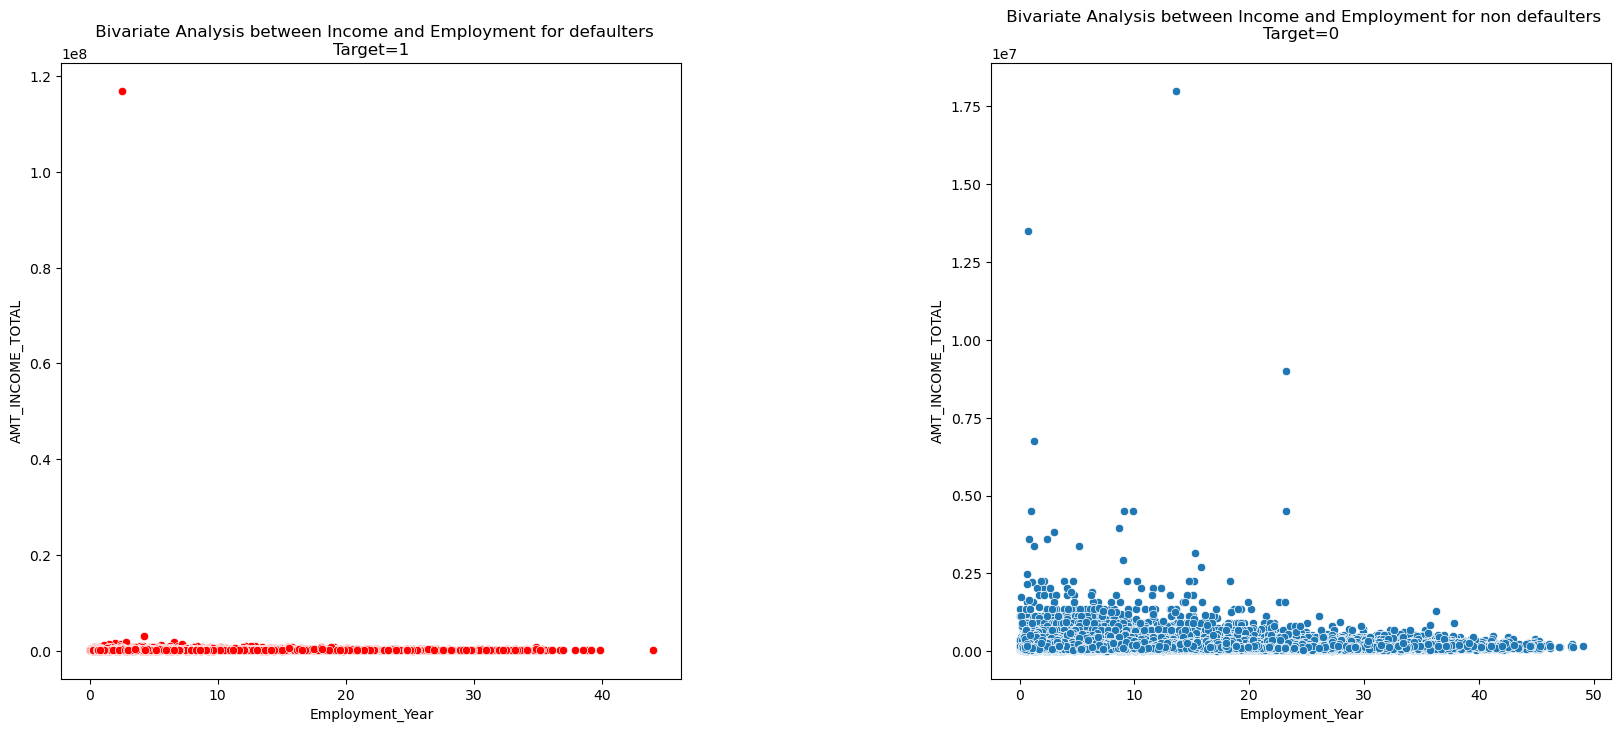

In [92]:
plt.figure(figsize=[20,8])
 
plt.subplot(1,2,1)
plt.title(" Bivariate Analysis between Income and Employment for defaulters\nTarget=1")
sns.scatterplot(x='Employment_Year',y='AMT_INCOME_TOTAL', data=def_r[def_r['Employment_Year']<1000], color='red')

plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,2)
plt.title(" Bivariate Analysis between Income and Employment for non defaulters\nTarget=0")
sns.scatterplot(x='Employment_Year',y='AMT_INCOME_TOTAL', data=non_def[non_def['Employment_Year']<1000])

plt.show()


#### Observation : It is quite evident from the above plots that most of the defaulters have very low income regardless of their duration of employment in years.
#### However, we can see that non defaulters have comparatively higher income than defaulters and it can be seen that total income is gradually reducing with increase in years of employment

### Target Variable : AMT_CREDIT and AMT_GOODS_PRICE

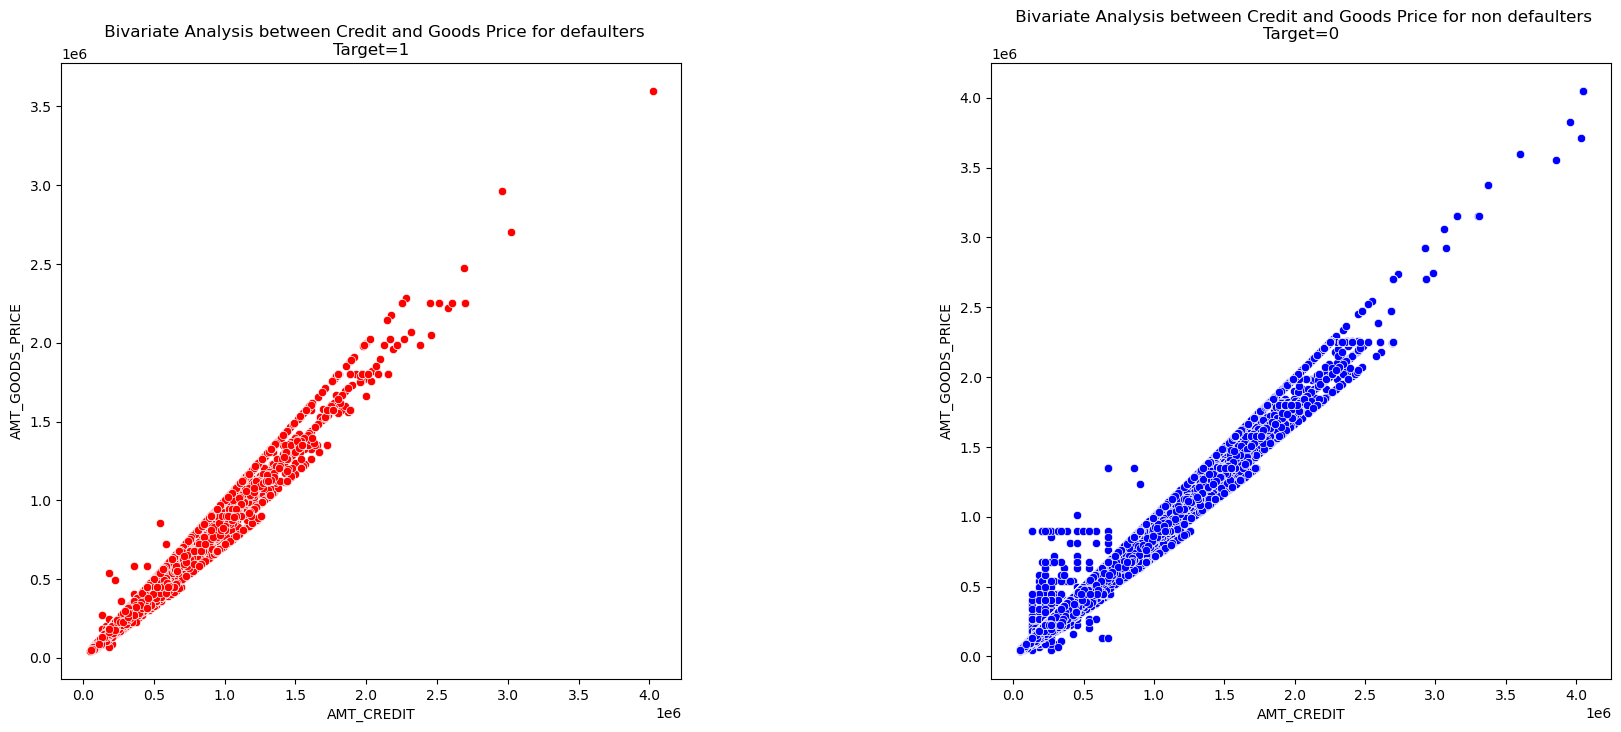

In [93]:
plt.figure(figsize=[20,8])
 
plt.subplot(1,2,1)
plt.title(" Bivariate Analysis between Credit and Goods Price for defaulters\nTarget=1")
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=def_r , color='red')

plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,2)
plt.title(" Bivariate Analysis between Credit and Goods Price for non defaulters\nTarget=0")
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=non_def , color='blue')

plt.show()

#### Observation : Amount Credit and Amount of goods price rare showing same trend in both the cases

### Target variable : AMT_CREDIT and AMT_ANNUITY

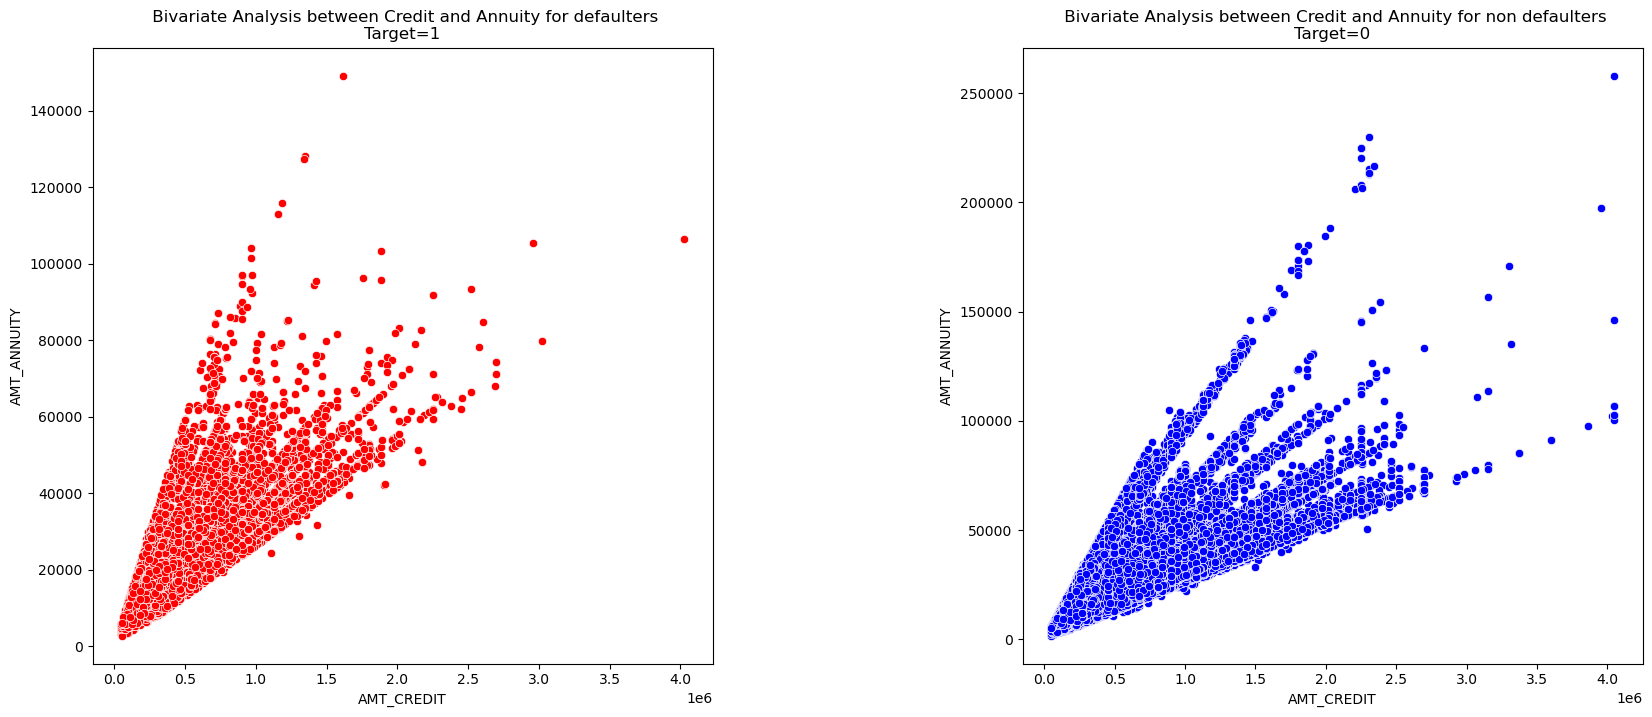

In [94]:
plt.figure(figsize=[20,8])
 
plt.subplot(1,2,1)
plt.title(" Bivariate Analysis between Credit and Annuity for defaulters\nTarget=1")
sns.scatterplot(x='AMT_CREDIT',y='AMT_ANNUITY',data=def_r , color='red')

plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,2)
plt.title(" Bivariate Analysis between Credit and Annuity for non defaulters\nTarget=0")
sns.scatterplot(x='AMT_CREDIT',y='AMT_ANNUITY',data=non_def , color='blue')

plt.show()

#### Observation : Amount Credit and Amount Annuity are showing same trend

### Target variable : REGION_POPULATION_RELATIVE & AMT_INCOME_TOTAL

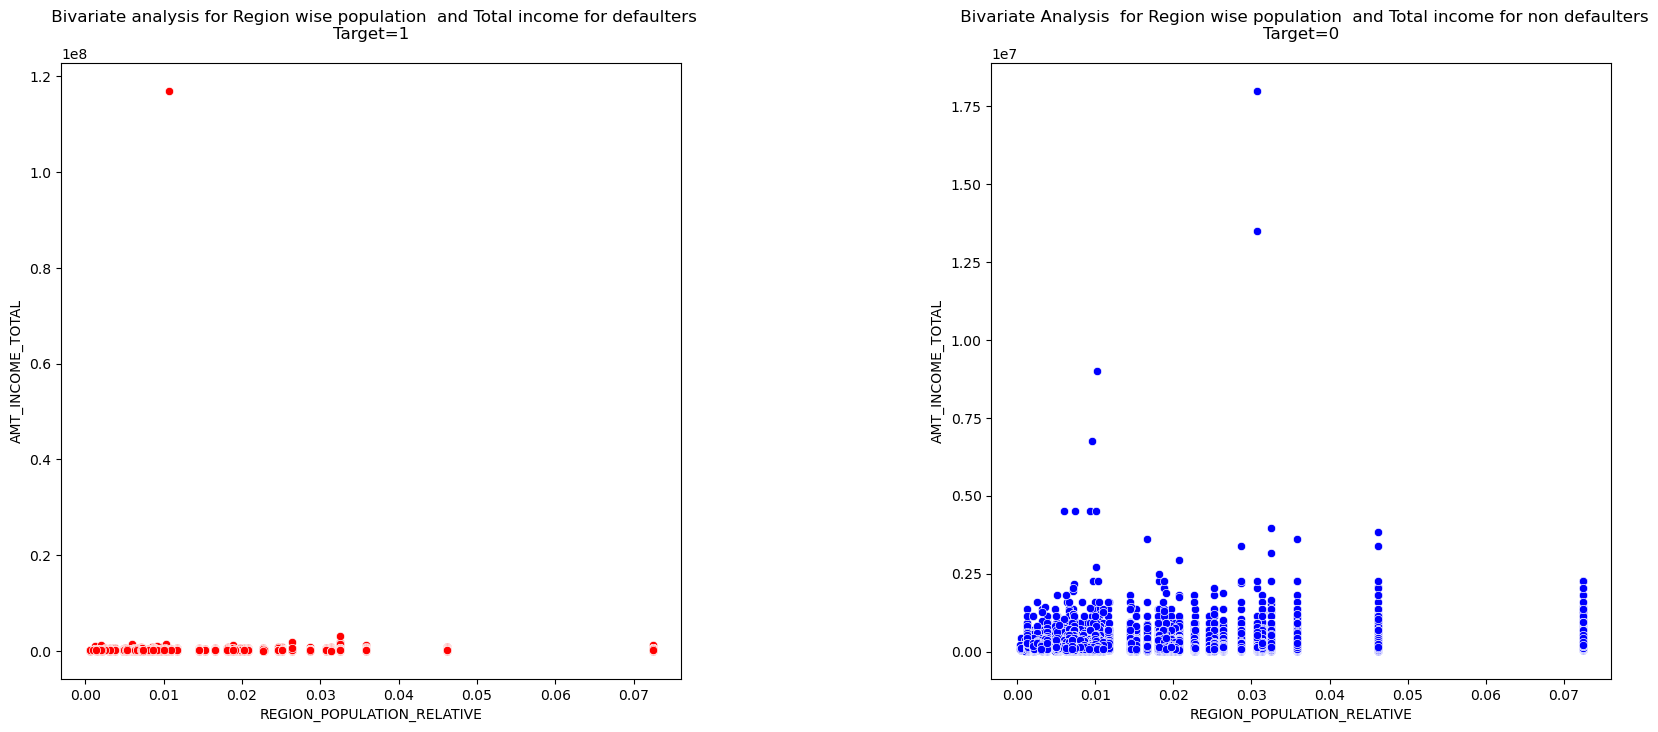

In [95]:
plt.figure(figsize=[20,8])
 
plt.subplot(1,2,1)
plt.title(" Bivariate analysis for Region wise population  and Total income for defaulters\nTarget=1")
sns.scatterplot(x='REGION_POPULATION_RELATIVE',y='AMT_INCOME_TOTAL',data=def_r , color='red')

plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,2)
plt.title(" Bivariate Analysis  for Region wise population  and Total income for non defaulters\nTarget=0")
sns.scatterplot(x='REGION_POPULATION_RELATIVE',y='AMT_INCOME_TOTAL',data=non_def , color='blue')

plt.show()

#### Observation : It can be seen from the above plot that most of the defaulters have very low income where region population is less dense. We can also see that non defaulters have comparatively higher incomes than defaulters in the same polpulation regions.

### Target variable : AMT_CREDiT and INCOME_GROUP

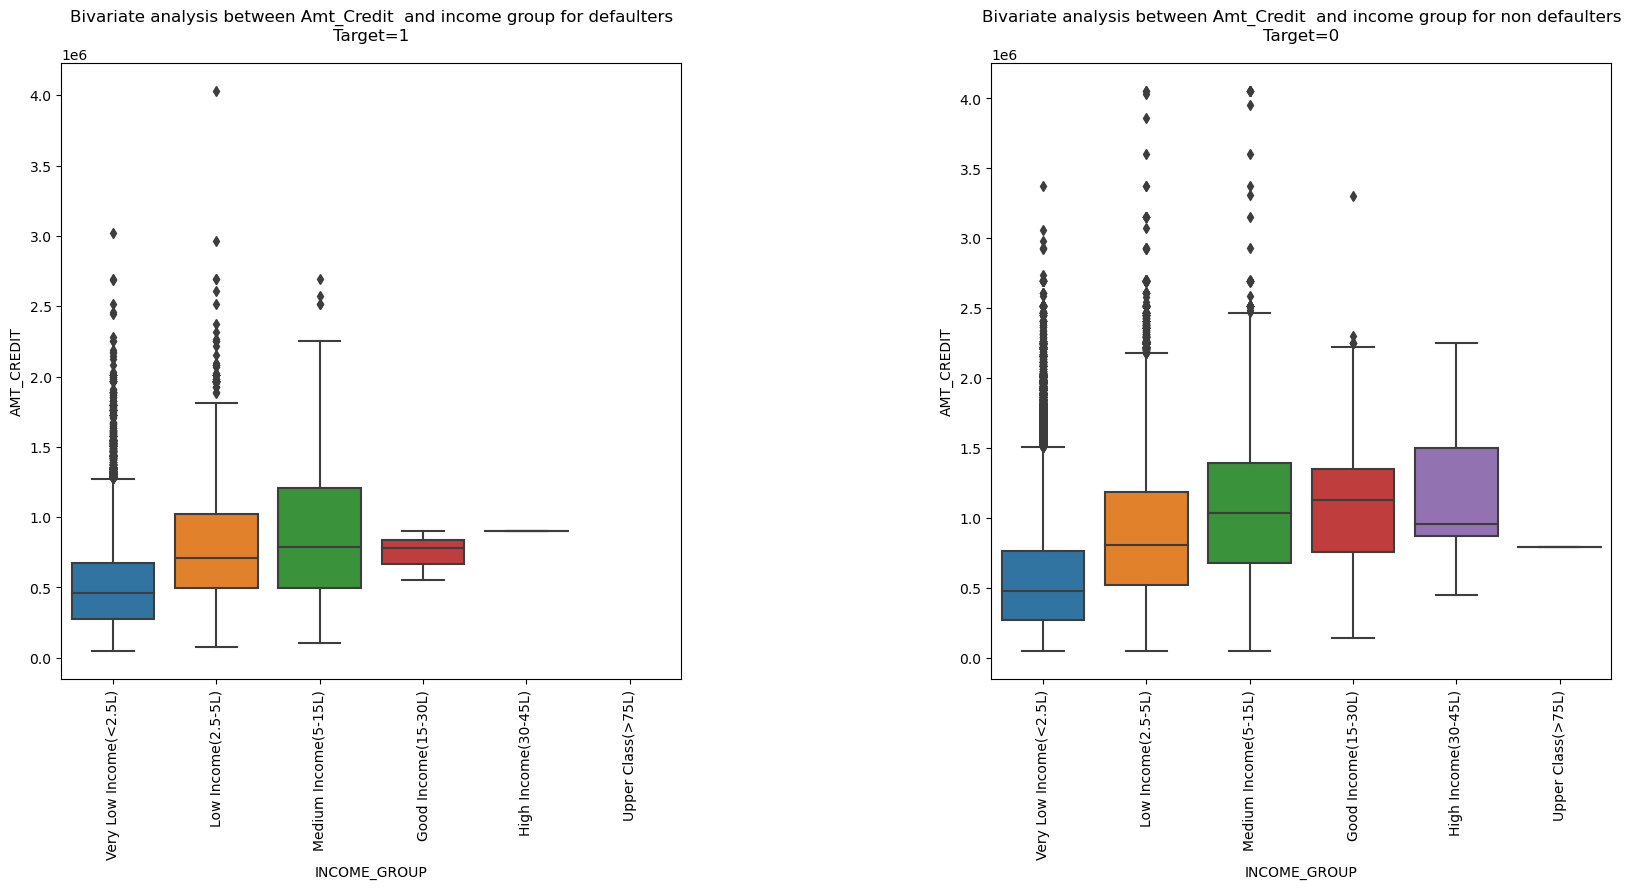

In [96]:
plt.figure(figsize=[20,8])
 
plt.subplot(1,2,1)
plt.xticks(rotation=90)
plt.title("Bivariate analysis between Amt_Credit  and income group for defaulters\nTarget=1")
sns.boxplot(x='INCOME_GROUP', y='AMT_CREDIT', data=def_r)


plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,2)
plt.xticks(rotation=90)
plt.title("Bivariate analysis between Amt_Credit  and income group for non defaulters\nTarget=0")
sns.boxplot(x='INCOME_GROUP', y='AMT_CREDIT', data=non_def)

plt.show()

#### We can infer that although the maximum no of loans is given to the Medium Income group, but then default value per loans highest in higher income group. The loan book of the financial institution can get affected duo to higher amount not being paid back.

### Target variable : Amt_credit & gender

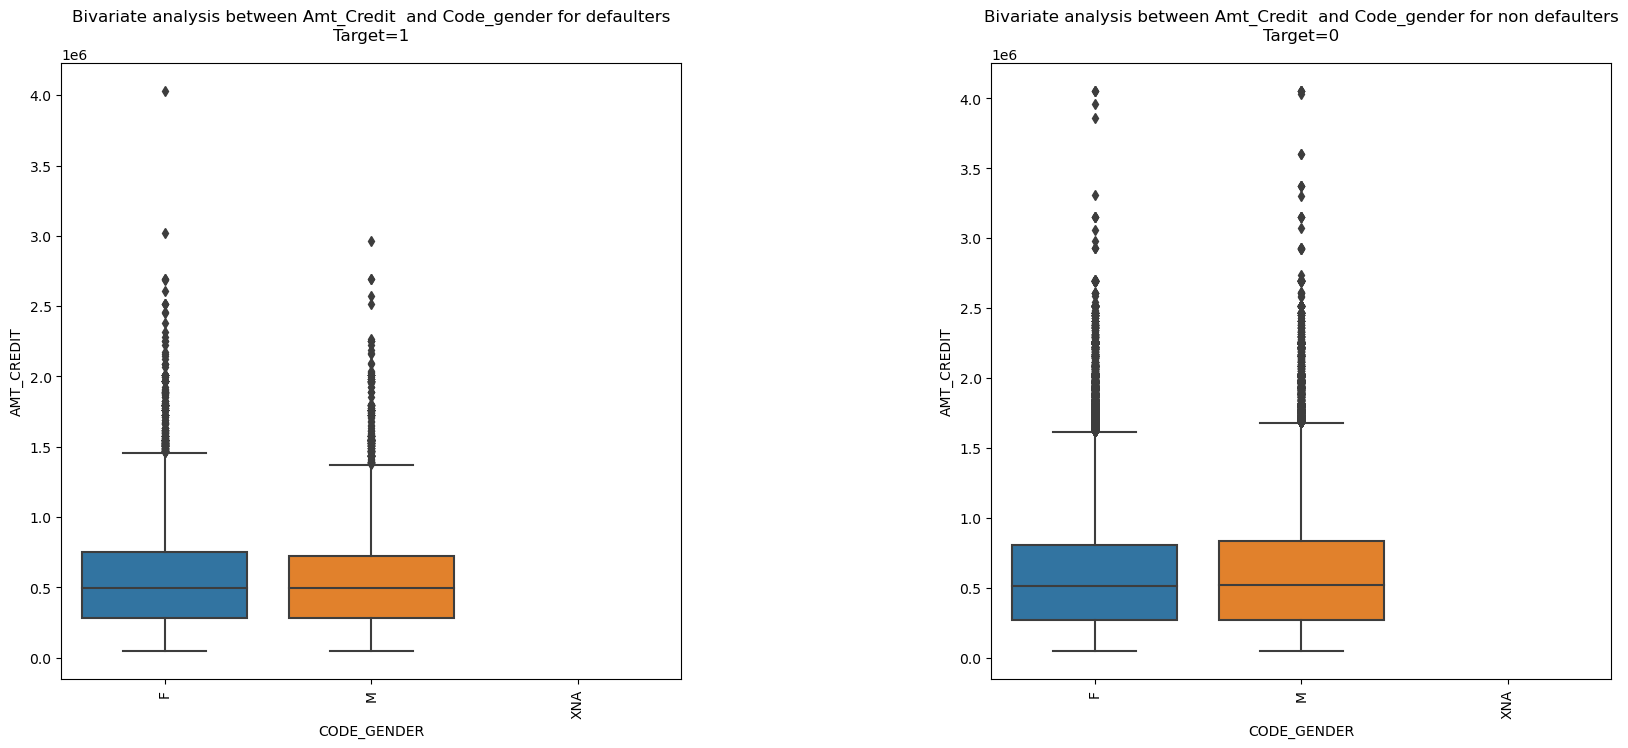

In [97]:
plt.figure(figsize=[20,8])
 
plt.subplot(1,2,1)
plt.xticks(rotation=90)
plt.title("Bivariate analysis between Amt_Credit  and Code_gender for defaulters\nTarget=1")
sns.boxplot(x='CODE_GENDER', y='AMT_CREDIT', data=def_r)


plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,2)
plt.xticks(rotation=90)
plt.title("Bivariate analysis between Amt_Credit  and Code_gender for non defaulters\nTarget=0")
sns.boxplot(x='CODE_GENDER', y='AMT_CREDIT', data=non_def)

plt.show()

#### Observation : However there are no big difference between male and female group but females have more amount credit range in defaulters.No of non defaulters in both male and female category are higher than defaulters.

## Read previous dataset

In [98]:
pre_data= pd.read_csv('previous_application.csv')
pre_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Data cleaning

In [99]:
pre_data.shape

(1670214, 37)

In [100]:
pre_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [101]:
pre_data.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [102]:
pre_data.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [103]:
# Checing the percentage of null values in previous data frame

pre_data.isnull().sum()/len(pre_data) *100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

#### Observation : There are few columns like  AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY, RATE_INTEREST_PRIVILEGED,NAME_TYPE_SUITE,DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION,NFALG_INSURED_ON_APPROVAL , have equal or more than 40% null vakues, so we can drop them.

### Merging previous data set and application dataset

In [112]:
loandata=data1.merge(pre_data, on='SK_ID_CURR')

In [113]:
loandata.shape

(1413701, 83)

In [114]:
loandata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [115]:
# Let's check the percentage of Name_contract_status

loandata['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100

NAME_CONTRACT_STATUS
Approved        62.679378
Canceled        18.351900
Refused         17.357984
Unused offer     1.610737
Name: proportion, dtype: float64

#### Plot the counts

In [131]:
approved_df=loandata[loandata['NAME_CONTRACT_STATUS']=='Approved']
refused_df=loandata[loandata['NAME_CONTRACT_STATUS']=='Refused']
canceled_df=loandata[loandata['NAME_CONTRACT_STATUS']=='Canceled']
unused_df=loandata[loandata['NAME_CONTRACT_STATUS']=='Unused offer']

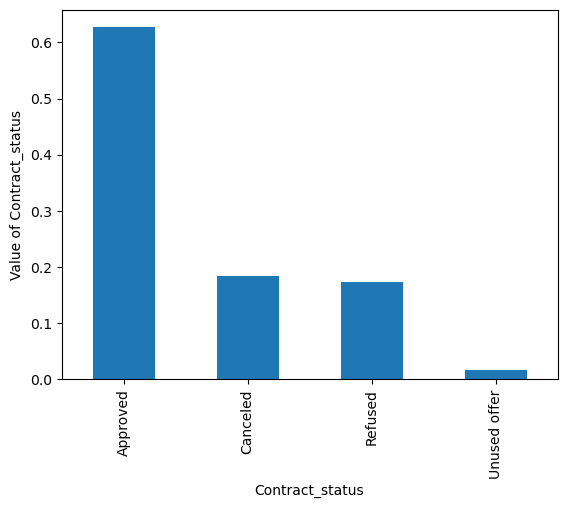

In [132]:
loandata.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.bar()
plt.xlabel('Contract_status')
plt.ylabel('Value of Contract_status')
plt.show()

### Analysis on variable NAME_CONTRACT_TYPE_X

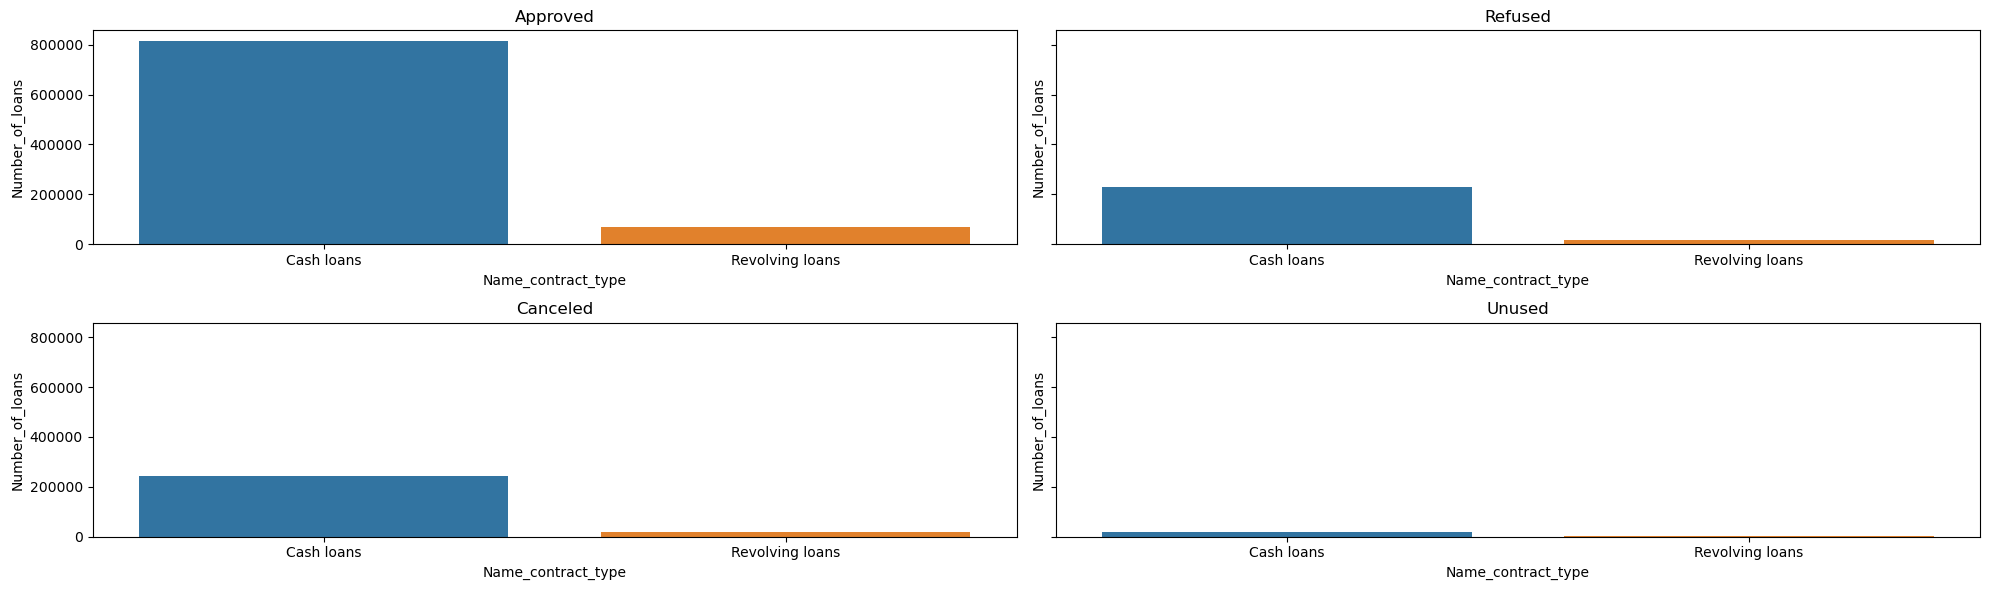

In [139]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2, figsize=(20,6),sharey=True)
ax1=sns.countplot(ax=ax1, data=approved_df, x='NAME_CONTRACT_TYPE_x')
ax1.set_title('Approved')
ax1.set_xlabel('Name_contract_type')
ax1.set_ylabel('Number_of_loans')
ax2=sns.countplot(ax=ax2, data=refused_df, x='NAME_CONTRACT_TYPE_x')
ax2.set_title('Refused')
ax2.set_xlabel('Name_contract_type')
ax2.set_ylabel('Number_of_loans')
ax3=sns.countplot(ax=ax3, data=canceled_df, x='NAME_CONTRACT_TYPE_x')
ax3.set_title('Canceled')
ax3.set_xlabel('Name_contract_type')
ax3.set_ylabel('Number_of_loans')
ax4=sns.countplot(ax=ax4, data=unused_df, x='NAME_CONTRACT_TYPE_x')
ax4.set_title('Unused')
ax4.set_xlabel('Name_contract_type')
ax4.set_ylabel('Number_of_loans')
plt.tight_layout()
plt.show()

#### Observation: It is seen that the amount of cash loans is higher than revolving loans in all 4 categories.

### Analysis on variable Name_client_type

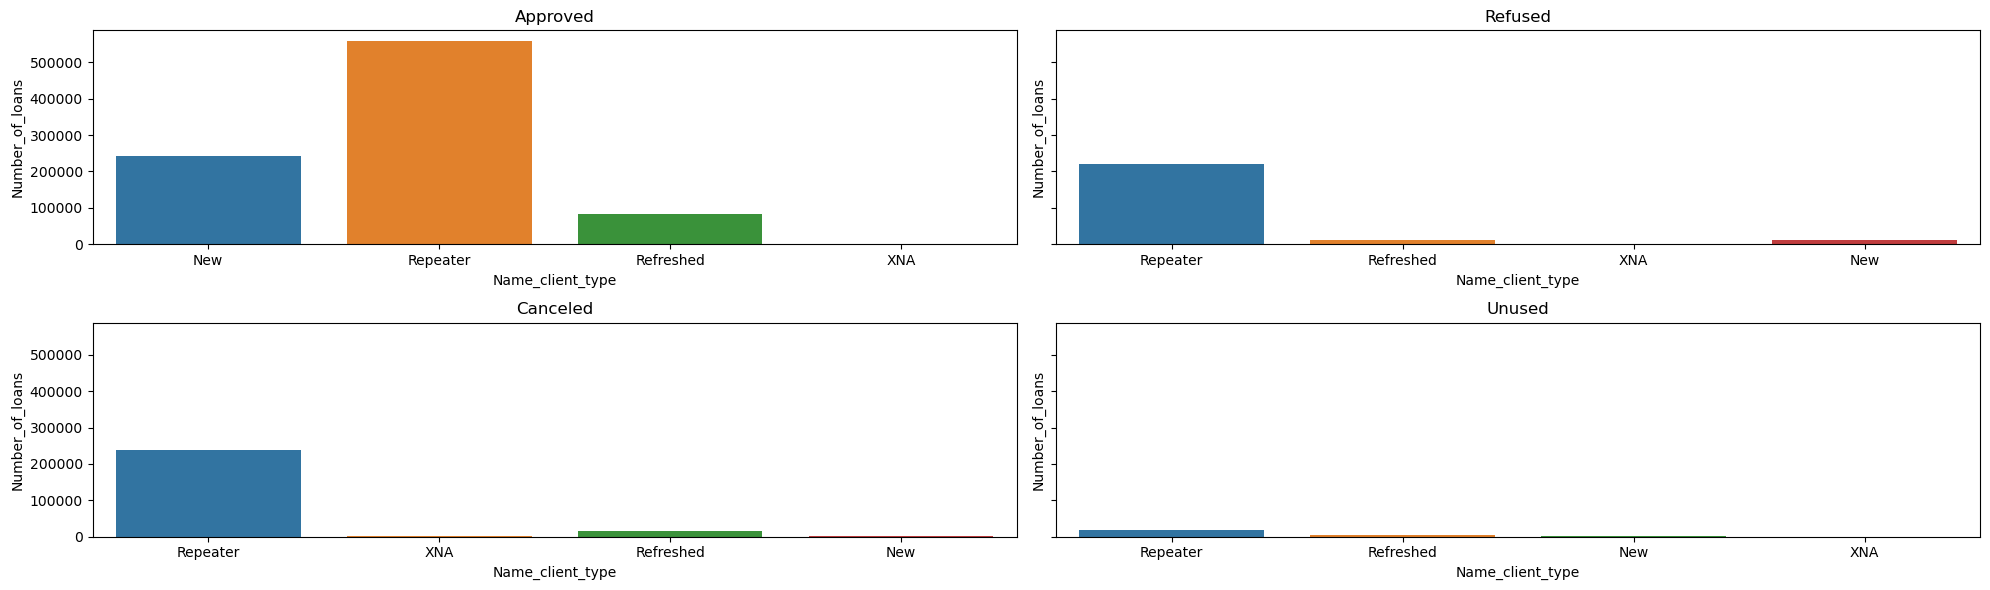

In [141]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2, figsize=(20,6),sharey=True)
ax1=sns.countplot(ax=ax1, data=approved_df, x='NAME_CLIENT_TYPE')
ax1.set_title('Approved')
ax1.set_xlabel('Name_client_type')
ax1.set_ylabel('Number_of_loans')
ax2=sns.countplot(ax=ax2, data=refused_df, x='NAME_CLIENT_TYPE')
ax2.set_title('Refused')
ax2.set_xlabel('Name_client_type')
ax2.set_ylabel('Number_of_loans')
ax3=sns.countplot(ax=ax3, data=canceled_df, x='NAME_CLIENT_TYPE')
ax3.set_title('Canceled')
ax3.set_xlabel('Name_client_type')
ax3.set_ylabel('Number_of_loans')
ax4=sns.countplot(ax=ax4, data=unused_df, x='NAME_CLIENT_TYPE')
ax4.set_title('Unused')
ax4.set_xlabel('Name_client_type')
ax4.set_ylabel('Number_of_loans')
plt.tight_layout()
plt.show()

#### Observation : Here we can see that the repeater is getting more refused and it is also getting more approved even that it is getting more canceled and unused.

### Analysis on variable CODE_GENDER

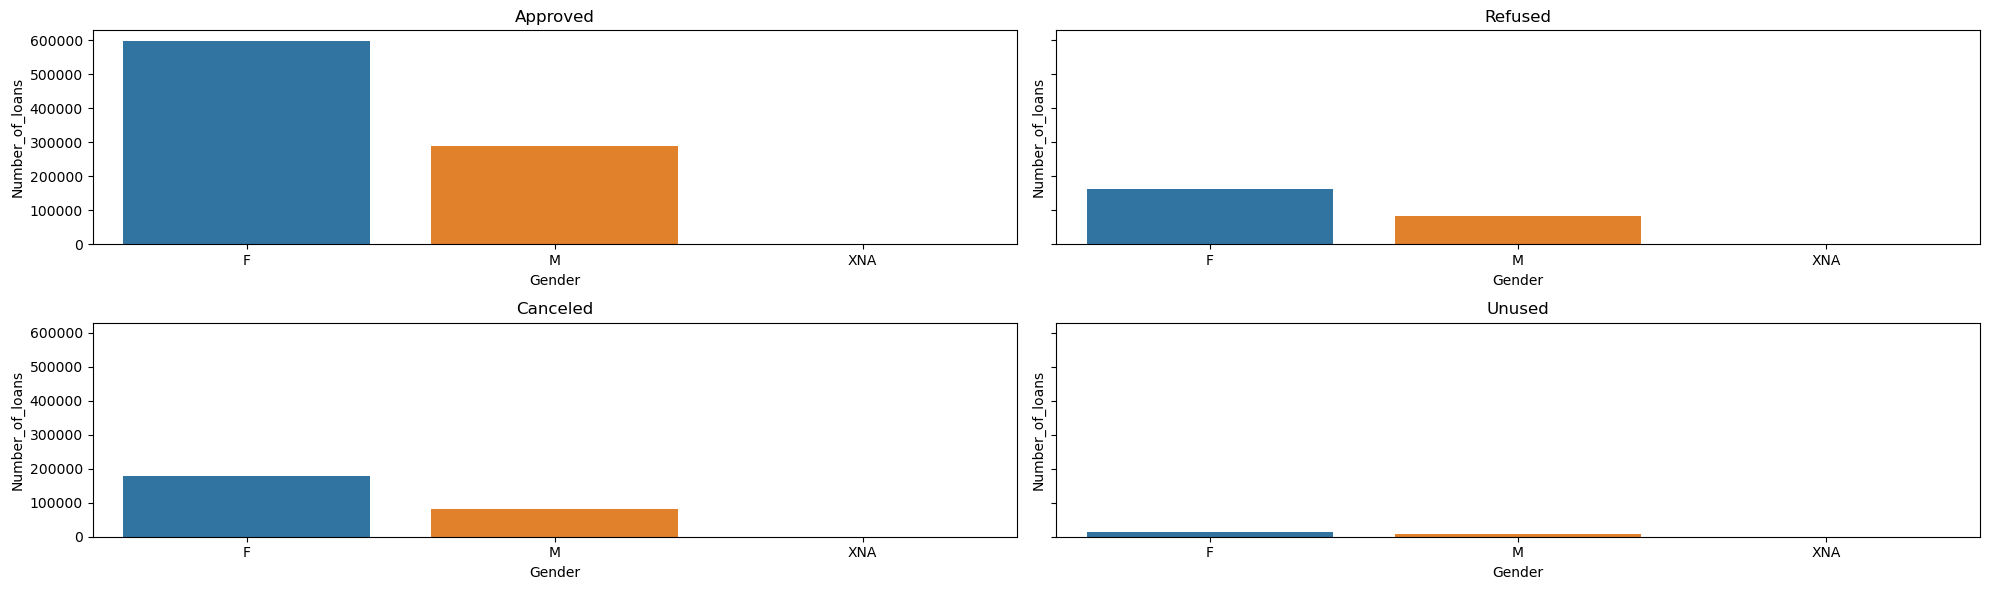

In [142]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2, figsize=(20,6),sharey=True)
ax1=sns.countplot(ax=ax1, data=approved_df, x='CODE_GENDER')
ax1.set_title('Approved')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Number_of_loans')
ax2=sns.countplot(ax=ax2, data=refused_df, x='CODE_GENDER')
ax2.set_title('Refused')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Number_of_loans')
ax3=sns.countplot(ax=ax3, data=canceled_df, x='CODE_GENDER')
ax3.set_title('Canceled')
ax3.set_xlabel('Gender')
ax3.set_ylabel('Number_of_loans')
ax4=sns.countplot(ax=ax4, data=unused_df, x='CODE_GENDER')
ax4.set_title('Unused')
ax4.set_xlabel('Gender')
ax4.set_ylabel('Number_of_loans')
plt.tight_layout()
plt.show()

#### Observation: Here we can see that female are getting more approved, more refused, more canceled and more unused than male.

### Analysis on variable Name_education_type

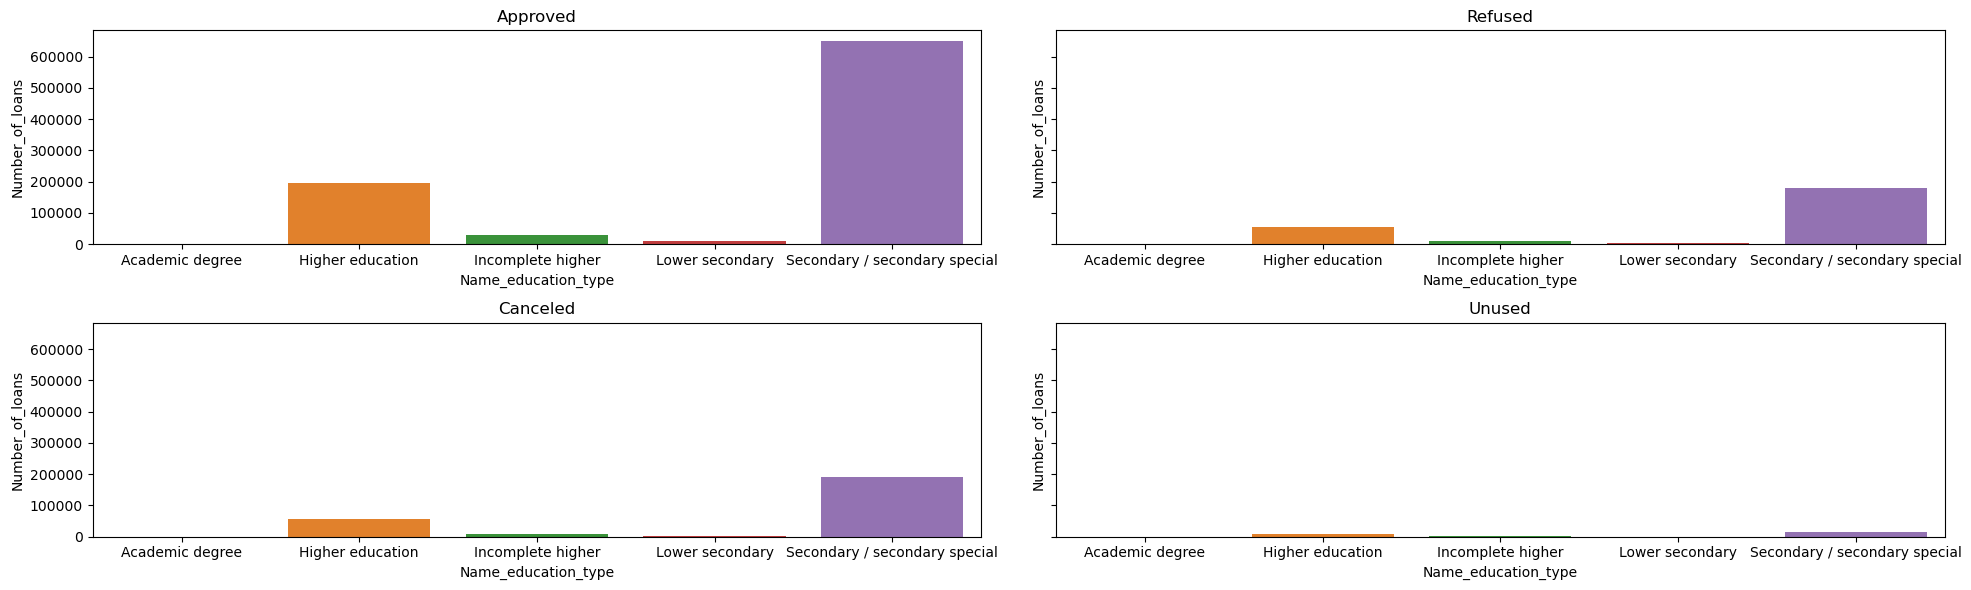

In [143]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2, figsize=(20,6),sharey=True)
ax1=sns.countplot(ax=ax1, data=approved_df, x='NAME_EDUCATION_TYPE')
ax1.set_title('Approved')
ax1.set_xlabel('Name_education_type')
ax1.set_ylabel('Number_of_loans')
ax2=sns.countplot(ax=ax2, data=refused_df, x='NAME_EDUCATION_TYPE')
ax2.set_title('Refused')
ax2.set_xlabel('Name_education_type')
ax2.set_ylabel('Number_of_loans')
ax3=sns.countplot(ax=ax3, data=canceled_df, x='NAME_EDUCATION_TYPE')
ax3.set_title('Canceled')
ax3.set_xlabel('Name_education_type')
ax3.set_ylabel('Number_of_loans')
ax4=sns.countplot(ax=ax4, data=unused_df, x='NAME_EDUCATION_TYPE')
ax4.set_title('Unused')
ax4.set_xlabel('Name_education_type')
ax4.set_ylabel('Number_of_loans')
plt.tight_layout()
plt.show()

#### Observation : Here we can see that the secondary or secondary special is more effective in every cases.

### Analysis on Name_income_type

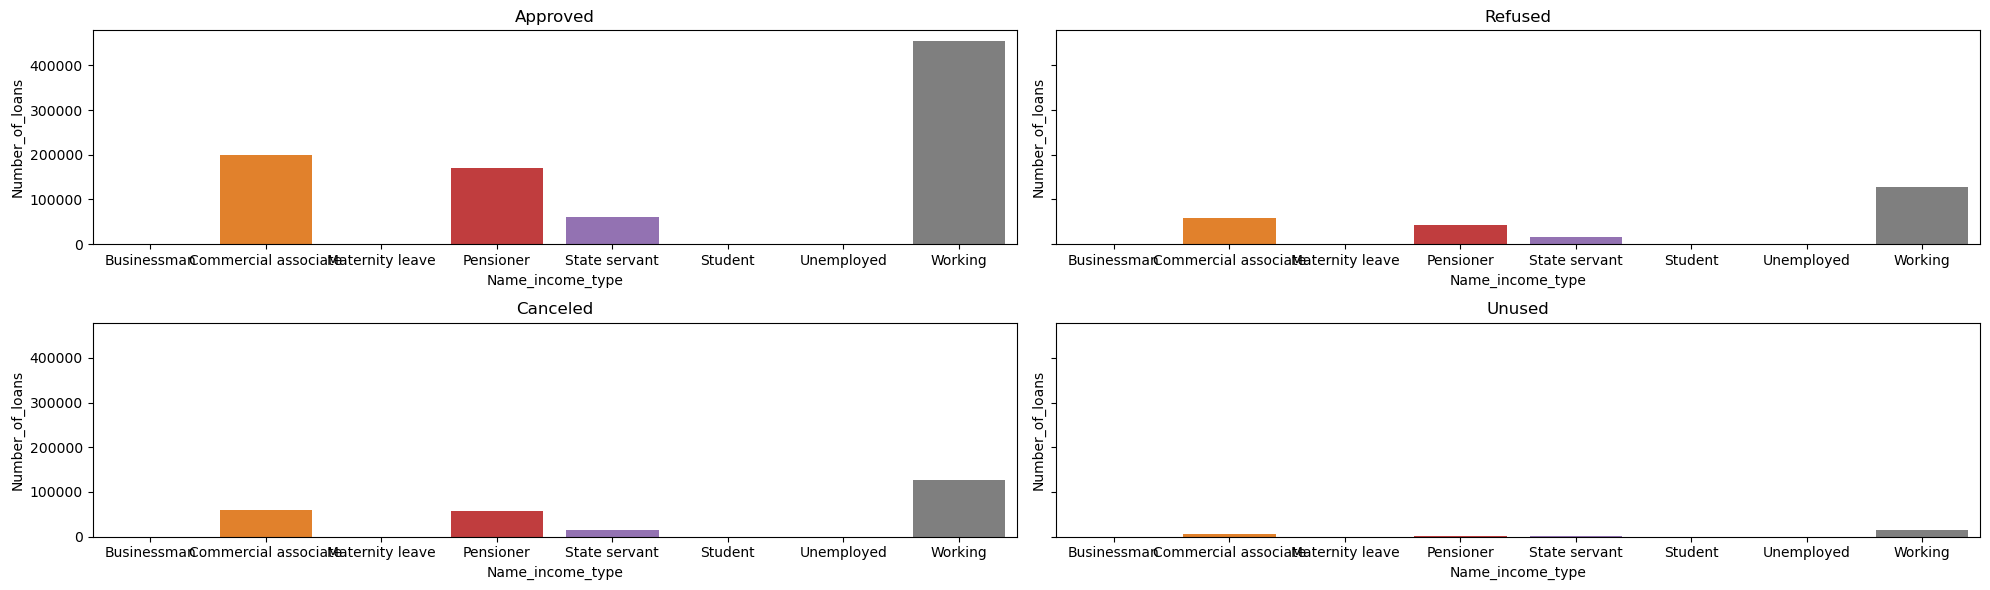

In [144]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2, figsize=(20,6),sharey=True)
ax1=sns.countplot(ax=ax1, data=approved_df, x='NAME_INCOME_TYPE')
ax1.set_title('Approved')
ax1.set_xlabel('Name_income_type')
ax1.set_ylabel('Number_of_loans')
ax2=sns.countplot(ax=ax2, data=refused_df, x='NAME_INCOME_TYPE')
ax2.set_title('Refused')
ax2.set_xlabel('Name_income_type')
ax2.set_ylabel('Number_of_loans')
ax3=sns.countplot(ax=ax3, data=canceled_df, x='NAME_INCOME_TYPE')
ax3.set_title('Canceled')
ax3.set_xlabel('Name_income_type')
ax3.set_ylabel('Number_of_loans')
ax4=sns.countplot(ax=ax4, data=unused_df, x='NAME_INCOME_TYPE')
ax4.set_title('Unused')
ax4.set_xlabel('Name_income_type')
ax4.set_ylabel('Number_of_loans')
plt.tight_layout()
plt.show()

#### Observation : Here we can see that working people are applying more loans as compared to others and also commercial associates are taking more loans.

### Analysis on Name_family_status

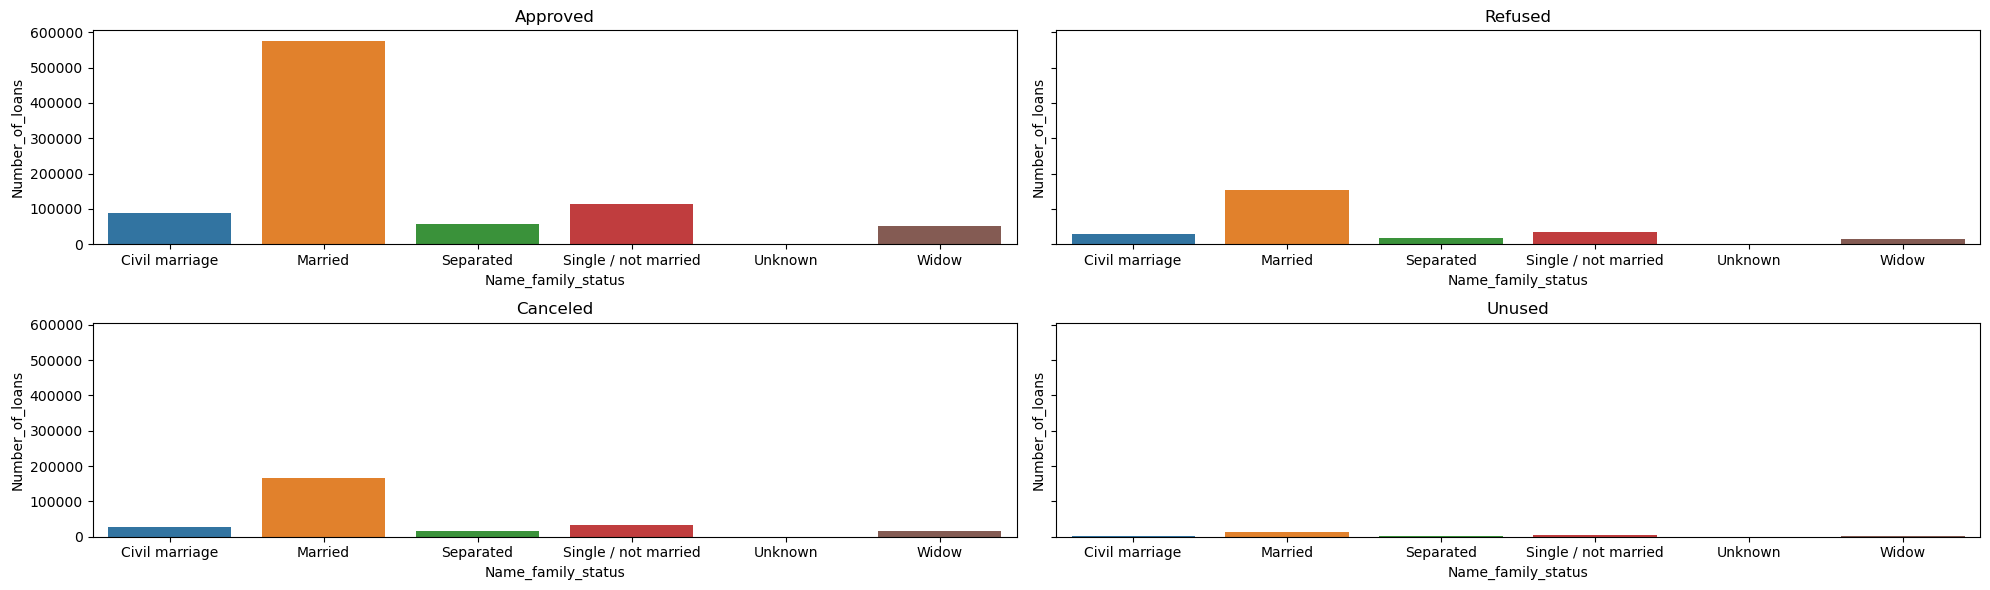

In [148]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2, figsize=(20,6),sharey=True)
ax1=sns.countplot(ax=ax1, data=approved_df, x='NAME_FAMILY_STATUS')
ax1.set_title('Approved')
ax1.set_xlabel('Name_family_status')
ax1.set_ylabel('Number_of_loans')
ax2=sns.countplot(ax=ax2, data=refused_df, x='NAME_FAMILY_STATUS')
ax2.set_title('Refused')
ax2.set_xlabel('Name_family_status')
ax2.set_ylabel('Number_of_loans')
ax3=sns.countplot(ax=ax3, data=canceled_df, x='NAME_FAMILY_STATUS')
ax3.set_title('Canceled')
ax3.set_xlabel('Name_family_status')
ax3.set_ylabel('Number_of_loans')
ax4=sns.countplot(ax=ax4, data=unused_df, x='NAME_FAMILY_STATUS')
ax4.set_title('Unused')
ax4.set_xlabel('Name_family_status')
ax4.set_ylabel('Number_of_loans')
plt.tight_layout()
plt.show()

#### Observation : Here we can see that married people are applying and taking more loans than others.

### Analysis on Occupation_type

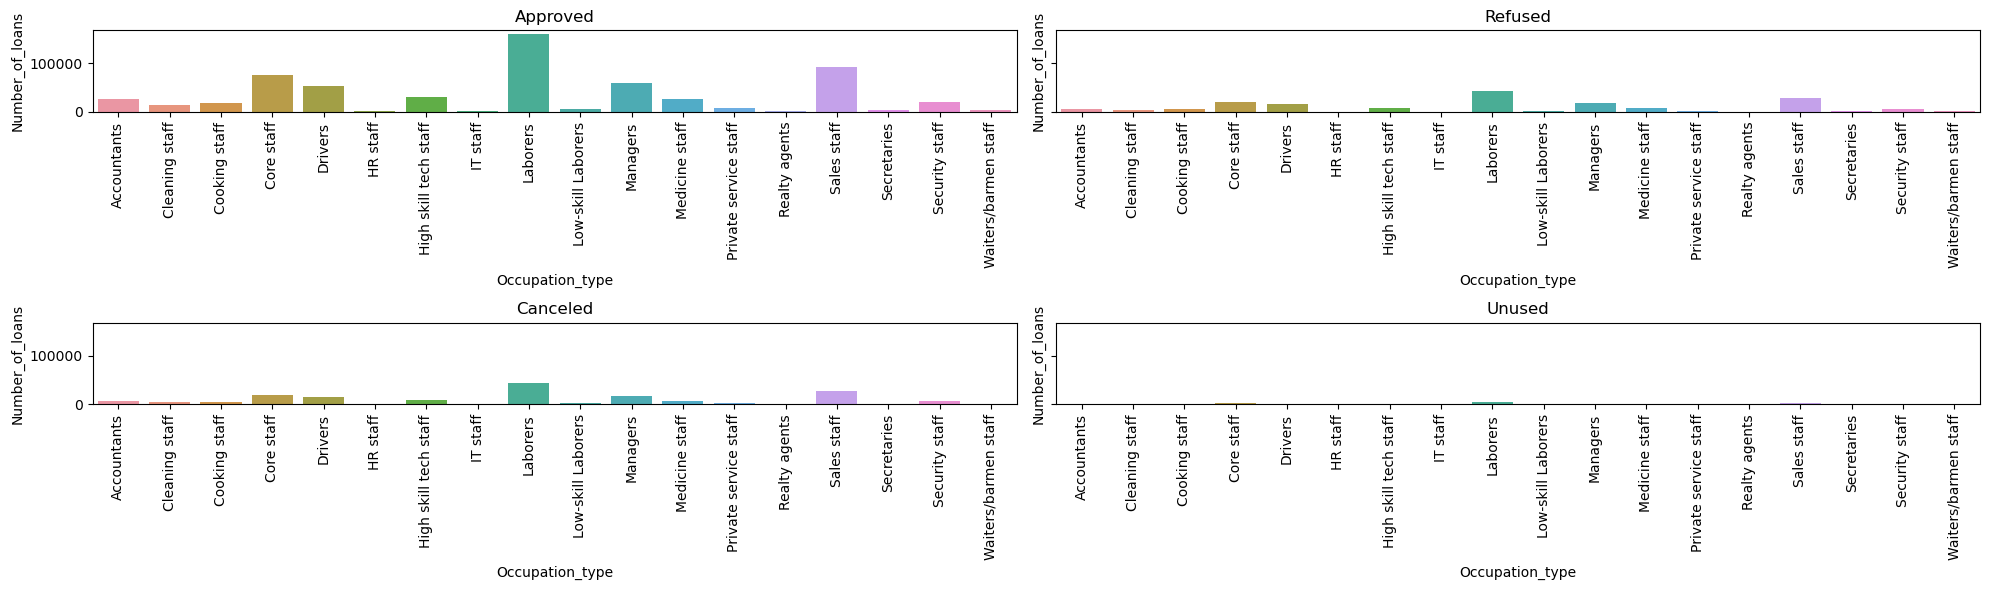

In [153]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2, figsize=(20,6),sharey=True)
ax1=sns.countplot(ax=ax1, data=approved_df, x='OCCUPATION_TYPE')
ax1.set_title('Approved')
ax1.set_xlabel('Occupation_type')
ax1.set_ylabel('Number_of_loans')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax2=sns.countplot(ax=ax2, data=refused_df, x='OCCUPATION_TYPE')
ax2.set_title('Refused')
ax2.set_xlabel('Occupation_type')
ax2.set_ylabel('Number_of_loans')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax3=sns.countplot(ax=ax3, data=canceled_df, x='OCCUPATION_TYPE')
ax3.set_title('Canceled')
ax3.set_xlabel('Occupation_type')
ax3.set_ylabel('Number_of_loans')
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)
ax4=sns.countplot(ax=ax4, data=unused_df, x='OCCUPATION_TYPE')
ax4.set_title('Unused')
ax4.set_xlabel('Occupation_type')
ax4.set_ylabel('Number_of_loans')
ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#### Observation : Here labourers are getting most refused and most approved loans. And also sales staff are also getting the second most refused and approved loans, so banks should focus on labourers.

In [1]:
### Conclusion :
#### 1. Banks should focus more on contract type “students” “pensioners” and 'Businessman' with housing “type other than “Co-op apartments for successful payments.

#### 2. Banks Should focus less on income 'working' as they are having Most number of unsuccessful payments.

#### 3. Get an much as clients from  having least housing type 'with parents'  as they are having least number of unsuccessful payments.
